## LIBRARIES

In [1]:
## FILE MANAGEMENT
import os

## DATA TABLES
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads
# pd.set_option('display.float_format', str) # optional: set number format in Pandas tables

## API CALL
from urllib.parse import urlencode
import urllib.request
import json
# from sodapy import Socrata

## VISUALIZATION
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

## FONTS

In [2]:
## FONTS ON SYSTEM
allfontsList = fm.findSystemFonts()
allfontsNames = [fm.FontProperties(fname=fname).get_name() for fname in allfontsList] # Gather names of all fonts to print with for loop below
# for i,f in enumerate(allfontNames):
#     print("[{}] '{}'\n'{}'".format(i,f,allfontsList[i].split('\\')[-1])) # Show all fonts

## FONT SELECTION
selfont = 'Univers' # Use the font Univers to search
selfontsList = [f for f in allfontsList if selfont in f] # Find all fonts
selfontsNames = [fm.FontProperties(fname=fname).get_name() for fname in selfontsList] # Gather names of selected fonts
for i,f in enumerate(selfontsList):
    print("[{}] '{}'\n'{}'".format(i,selfontsNames[i],f.split('\\')[-1])) # Show selected fonts

for font_file in selfontsList:
    fm.fontManager.addfont(font_file) # Load selected fonts

[0] 'Univers'
'Univers-Condensed.otf'
[1] 'Univers'
'Univers-BlackExtObl.otf'
[2] 'Univers'
'Univers-BoldExt.otf'
[3] 'Univers'
'Univers-CondensedLtOblique.otf'
[4] 'Univers'
'Univers-Bold.otf'
[5] 'Univers'
'Univers-CondensedBold.otf'
[6] 'Univers'
'Univers-Light.otf'
[7] 'Univers'
'Univers-Black.otf'
[8] 'Univers'
'Univers-ThinUltraCondensed.otf'
[9] 'Univers'
'Univers-BlackOblique.otf'
[10] 'Univers'
'Univers-ExtraBlackExt.otf'
[11] 'Univers'
'Univers-ExtraBlackExtObl.otf'
[12] 'Univers'
'Univers-ExtraBlackObl.otf'
[13] 'Univers'
'Univers-CondensedBdOblique.otf'
[14] 'Univers'
'Univers-CondensedOblique.otf'
[15] 'Univers'
'Univers-BoldExtObl.otf'
[16] 'Univers'
'Univers-LightOblique.otf'
[17] 'Univers'
'Univers-CondensedLight.otf'
[18] 'Univers'
'Univers-UltraCondensed.otf'
[19] 'Univers'
'Univers-Oblique.otf'
[20] 'Univers'
'Univers.otf'
[21] 'Univers'
'Univers-BoldOblique.otf'
[22] 'Univers'
'Univers-LightUltraCondensed.otf'
[23] 'Univers'
'Univers-ExtendedObl.otf'
[24] 'Univers'


In [3]:
## Set Univers as Default
font = {'family' : 'sans-serif',
        'sans-serif' : ['Univers']}
plt.rc('font',**font)

## Run the commented code if you need to reset to Matplotlib defaults
# plt.style.use('default')
# plt.rcdefaults()

# Gathering and Cleaning Data

## DOB Permit Issuance

Department of Buildings (DOB). “DOB Permit Issuance.” CSV, Table. \
New York: NYC OpenData, July 26, 2024. \
Accessed July 26th, 2024 via:
https://data.cityofnewyork.us/Housing-Development/DOB-Permit-Issuance/ipu4-2q9a/about_data.



### Columns of Note:

**Temporal Reference, for Time Series**

| Column Name | API Field Name |
| --- | --- |
| 'Filing Date' | filing_date | 
| 'Issuance Date' |  issuance_date |
| 'Job Start Date' | job_start_date |

**Spatial Reference, for Spatial Join**

| Column Name | API Field Name |
| --- | --- |
| 'LATITUDE' | gis_latitude | 
| 'LONGITUDE' | gis_longitude |
| 'Lot' | lot |
| 'Block' | block |
| 'BOROUGH' | borough |
| 'CENSUS_TRACT' | gis_census_tract |
| 'NTA_NAME' | gis_nta_name |
| 'COUNCIL_DISTRICT' | gis_council_district |

*For BOROUGH: 1= Manhattan, 2= Bronx, 3 = Brooklyn, 4 = Queens, 5 = Staten Island*

In [4]:
## Column Dictionary with column and API names (copied from website)
columnguide = pd.read_csv("metadata/DD_DOB_Permit_Issuance_Columns.csv", 
                          encoding="cp1252") # the NYC Open Data website used smart quotation marks, must load with this encoding

## Cleaned API Field name (without underscores)
columnguide['Clean API Field Name'] = columnguide['API Field Name'].str.strip("_")
display(columnguide)

,Column Name,Description,API Field Name,Data Type,shortname,datatype,boolflag,catflag,dtflag,Clean API Field Name
0,BOROUGH,"1= Manhattan, 2= Bronx, 3 = Brooklyn, 4 = Quee...",borough,Text,boro,str,0,0,0,borough
1,Bin #,Number assigned by City Planning to a specific...,bin__,Text,bin,int64,0,0,0,bin
2,House #,House Number of Residence or Commercial Property,house__,Text,house,str,0,0,0,house
3,Street Name,Street Name where Property is located,street_name,Text,street,str,0,0,0,street_name
4,Job #,Number assigned by DOB to Job Filing,job__,Text,jobnum,int64,0,0,0,job
5,Job doc. #,Document Number,job_doc___,Text,jobdoc,int64,0,0,0,job_doc
6,Job Type,"Job Type, based on DOB Job Code (NB-New Buildi...",job_type,Text,jobtype,str,0,0,0,job_type
7,Self_Cert,Self_Cert,self_cert,Text,selfcert,str,1,0,0,self_cert
8,Block,Tax block assigned by Department of Finance,block,Text,block,int64,0,0,0,block
9,Lot,Tax lot assigned by Department of Finance,lot,Text,lot,int64,0,0,0,lot


#### Dictionaries for Short Name (Shapefile Export)

In [5]:
## dictionaries for 'column=' in .rename(), 10 characters during shapefile export
renamecol_dict = dict(zip(columnguide['Column Name'], columnguide['shortname'])) # downloaded file columns name to clean name
renameapi_dict = dict(zip(columnguide['API Field Name'], columnguide['shortname'])) # API column name to clean name
renameclean_dict = dict(zip(columnguide['Clean API Field Name'], columnguide['shortname'])) # Clean name to short name (for shapefiles)
longname_dict = dict(zip(columnguide['shortname'], columnguide['Clean API Field Name'])) # vice versa

display(renamecol_dict)
display(renameapi_dict)
display(renameclean_dict)
display(longname_dict)

{'BOROUGH': 'boro',
 'Bin #': 'bin',
 'House #': 'house',
 'Street Name': 'street',
 'Job #': 'jobnum',
 'Job doc. #': 'jobdoc',
 'Job Type': 'jobtype',
 'Self_Cert': 'selfcert',
 'Block': 'block',
 'Lot': 'lot',
 'Community Board': 'CB',
 'Zip Code': 'zip',
 'Bldg Type': 'bldgtype',
 'Residential': 'res',
 'Special District 1': 'spd1',
 'Special District 2': 'spd2',
 'Work Type': 'worktype',
 'Permit Status': 'status',
 'Filing Status': 'statusfil',
 'Permit Type': 'type',
 'Permit Sequence #': 'seqnum',
 'Permit Subtype': 'subtype',
 'Oil Gas': 'oilgas',
 'Site Fill': 'sitefill',
 'Filing Date': 'datefil',
 'Issuance Date': 'dateiss',
 'Expiration Date': 'dateexp',
 'Job Start Date': 'datejob',
 "Permittee's First Name": 'P_fname',
 "Permittee's Last Name": 'P_lname',
 "Permittee's Business Name": 'P_bname',
 "Permittee's Phone #": 'P_phone',
 "Permittee's License Type": 'P_lictype',
 "Permittee's License #": 'P_licnum',
 'Act as Superintendent': 'P_supt',
 "Permittee's Other Title":

{'borough': 'boro',
 'bin__': 'bin',
 'house__': 'house',
 'street_name': 'street',
 'job__': 'jobnum',
 'job_doc___': 'jobdoc',
 'job_type': 'jobtype',
 'self_cert': 'selfcert',
 'block': 'block',
 'lot': 'lot',
 'community_board': 'CB',
 'zip_code': 'zip',
 'bldg_type': 'bldgtype',
 'residential': 'res',
 'special_district_1': 'spd1',
 'special_district_2': 'spd2',
 'work_type': 'worktype',
 'permit_status': 'status',
 'filing_status': 'statusfil',
 'permit_type': 'type',
 'permit_sequence__': 'seqnum',
 'permit_subtype': 'subtype',
 'oil_gas': 'oilgas',
 'site_fill': 'sitefill',
 'filing_date': 'datefil',
 'issuance_date': 'dateiss',
 'expiration_date': 'dateexp',
 'job_start_date': 'datejob',
 'permittee_s_first_name': 'P_fname',
 'permittee_s_last_name': 'P_lname',
 'permittee_s_business_name': 'P_bname',
 'permittee_s_phone__': 'P_phone',
 'permittee_s_license_type': 'P_lictype',
 'permittee_s_license__': 'P_licnum',
 'act_as_superintendent': 'P_supt',
 'permittee_s_other_title':

{'borough': 'boro',
 'bin': 'bin',
 'house': 'house',
 'street_name': 'street',
 'job': 'jobnum',
 'job_doc': 'jobdoc',
 'job_type': 'jobtype',
 'self_cert': 'selfcert',
 'block': 'block',
 'lot': 'lot',
 'community_board': 'CB',
 'zip_code': 'zip',
 'bldg_type': 'bldgtype',
 'residential': 'res',
 'special_district_1': 'spd1',
 'special_district_2': 'spd2',
 'work_type': 'worktype',
 'permit_status': 'status',
 'filing_status': 'statusfil',
 'permit_type': 'type',
 'permit_sequence': 'seqnum',
 'permit_subtype': 'subtype',
 'oil_gas': 'oilgas',
 'site_fill': 'sitefill',
 'filing_date': 'datefil',
 'issuance_date': 'dateiss',
 'expiration_date': 'dateexp',
 'job_start_date': 'datejob',
 'permittee_s_first_name': 'P_fname',
 'permittee_s_last_name': 'P_lname',
 'permittee_s_business_name': 'P_bname',
 'permittee_s_phone': 'P_phone',
 'permittee_s_license_type': 'P_lictype',
 'permittee_s_license': 'P_licnum',
 'act_as_superintendent': 'P_supt',
 'permittee_s_other_title': 'P_title',
 'h

{'boro': 'borough',
 'bin': 'bin',
 'house': 'house',
 'street': 'street_name',
 'jobnum': 'job',
 'jobdoc': 'job_doc',
 'jobtype': 'job_type',
 'selfcert': 'self_cert',
 'block': 'block',
 'lot': 'lot',
 'CB': 'community_board',
 'zip': 'zip_code',
 'bldgtype': 'bldg_type',
 'res': 'residential',
 'spd1': 'special_district_1',
 'spd2': 'special_district_2',
 'worktype': 'work_type',
 'status': 'permit_status',
 'statusfil': 'filing_status',
 'type': 'permit_type',
 'seqnum': 'permit_sequence',
 'subtype': 'permit_subtype',
 'oilgas': 'oil_gas',
 'sitefill': 'site_fill',
 'datefil': 'filing_date',
 'dateiss': 'issuance_date',
 'dateexp': 'expiration_date',
 'datejob': 'job_start_date',
 'P_fname': 'permittee_s_first_name',
 'P_lname': 'permittee_s_last_name',
 'P_bname': 'permittee_s_business_name',
 'P_phone': 'permittee_s_phone',
 'P_lictype': 'permittee_s_license_type',
 'P_licnum': 'permittee_s_license',
 'P_supt': 'act_as_superintendent',
 'P_title': 'permittee_s_other_title',
 'h

#### Dictionaries for filetype on read

In [6]:
## dataype
## can be used in pd.read_csv("", dtype={})
dtypecol_dict = dict(zip(columnguide['Column Name'], columnguide['datatype'])) # downloaded file columns name to clean name
dtypeapi_dict = dict(zip(columnguide['API Field Name'], columnguide['datatype'])) # API column name to clean name
dtypeclean_dict = dict(zip(columnguide['Clean API Field Name'], columnguide['datatype'])) # Clean name to short name (for shapefiles)
dtypeshort_dict = dict(zip(columnguide['shortname'], columnguide['datatype'])) # vice versa

display(dtypecol_dict)
display(dtypeapi_dict)
display(dtypeclean_dict)
display(dtypeshort_dict)

{'BOROUGH': 'str',
 'Bin #': 'int64',
 'House #': 'str',
 'Street Name': 'str',
 'Job #': 'int64',
 'Job doc. #': 'int64',
 'Job Type': 'str',
 'Self_Cert': 'str',
 'Block': 'int64',
 'Lot': 'int64',
 'Community Board': 'int64',
 'Zip Code': 'int64',
 'Bldg Type': 'int64',
 'Residential': 'str',
 'Special District 1': 'str',
 'Special District 2': 'str',
 'Work Type': 'str',
 'Permit Status': 'str',
 'Filing Status': 'str',
 'Permit Type': 'str',
 'Permit Sequence #': 'int64',
 'Permit Subtype': 'str',
 'Oil Gas': 'str',
 'Site Fill': 'str',
 'Filing Date': 'str',
 'Issuance Date': 'str',
 'Expiration Date': 'str',
 'Job Start Date': 'str',
 "Permittee's First Name": 'str',
 "Permittee's Last Name": 'str',
 "Permittee's Business Name": 'str',
 "Permittee's Phone #": 'int64',
 "Permittee's License Type": 'str',
 "Permittee's License #": 'str',
 'Act as Superintendent': 'str',
 "Permittee's Other Title": 'str',
 'HIC License': 'int64',
 "Site Safety Mgr's First Name": 'str',
 "Site Safet

{'borough': 'str',
 'bin__': 'int64',
 'house__': 'str',
 'street_name': 'str',
 'job__': 'int64',
 'job_doc___': 'int64',
 'job_type': 'str',
 'self_cert': 'str',
 'block': 'int64',
 'lot': 'int64',
 'community_board': 'int64',
 'zip_code': 'int64',
 'bldg_type': 'int64',
 'residential': 'str',
 'special_district_1': 'str',
 'special_district_2': 'str',
 'work_type': 'str',
 'permit_status': 'str',
 'filing_status': 'str',
 'permit_type': 'str',
 'permit_sequence__': 'int64',
 'permit_subtype': 'str',
 'oil_gas': 'str',
 'site_fill': 'str',
 'filing_date': 'str',
 'issuance_date': 'str',
 'expiration_date': 'str',
 'job_start_date': 'str',
 'permittee_s_first_name': 'str',
 'permittee_s_last_name': 'str',
 'permittee_s_business_name': 'str',
 'permittee_s_phone__': 'int64',
 'permittee_s_license_type': 'str',
 'permittee_s_license__': 'str',
 'act_as_superintendent': 'str',
 'permittee_s_other_title': 'str',
 'hic_license': 'int64',
 'site_safety_mgr_s_first_name': 'str',
 'site_safet

{'borough': 'str',
 'bin': 'int64',
 'house': 'str',
 'street_name': 'str',
 'job': 'int64',
 'job_doc': 'int64',
 'job_type': 'str',
 'self_cert': 'str',
 'block': 'int64',
 'lot': 'int64',
 'community_board': 'int64',
 'zip_code': 'int64',
 'bldg_type': 'int64',
 'residential': 'str',
 'special_district_1': 'str',
 'special_district_2': 'str',
 'work_type': 'str',
 'permit_status': 'str',
 'filing_status': 'str',
 'permit_type': 'str',
 'permit_sequence': 'int64',
 'permit_subtype': 'str',
 'oil_gas': 'str',
 'site_fill': 'str',
 'filing_date': 'str',
 'issuance_date': 'str',
 'expiration_date': 'str',
 'job_start_date': 'str',
 'permittee_s_first_name': 'str',
 'permittee_s_last_name': 'str',
 'permittee_s_business_name': 'str',
 'permittee_s_phone': 'int64',
 'permittee_s_license_type': 'str',
 'permittee_s_license': 'str',
 'act_as_superintendent': 'str',
 'permittee_s_other_title': 'str',
 'hic_license': 'int64',
 'site_safety_mgr_s_first_name': 'str',
 'site_safety_mgr_s_last_na

{'boro': 'str',
 'bin': 'int64',
 'house': 'str',
 'street': 'str',
 'jobnum': 'int64',
 'jobdoc': 'int64',
 'jobtype': 'str',
 'selfcert': 'str',
 'block': 'int64',
 'lot': 'int64',
 'CB': 'int64',
 'zip': 'int64',
 'bldgtype': 'int64',
 'res': 'str',
 'spd1': 'str',
 'spd2': 'str',
 'worktype': 'str',
 'status': 'str',
 'statusfil': 'str',
 'type': 'str',
 'seqnum': 'int64',
 'subtype': 'str',
 'oilgas': 'str',
 'sitefill': 'str',
 'datefil': 'str',
 'dateiss': 'str',
 'dateexp': 'str',
 'datejob': 'str',
 'P_fname': 'str',
 'P_lname': 'str',
 'P_bname': 'str',
 'P_phone': 'int64',
 'P_lictype': 'str',
 'P_licnum': 'str',
 'P_supt': 'str',
 'P_title': 'str',
 'hiclic': 'int64',
 'SSM_fname': 'str',
 'SSM_lname': 'str',
 'SSM_bname': 'str',
 'SUP_flname': 'str',
 'SUP_bname': 'str',
 'O_btype': 'str',
 'nonprofit': 'str',
 'O_bname': 'str',
 'O_fname': 'str',
 'O_lname': 'str',
 'O_hnum': 'str',
 'O_hstreet': 'str',
 'O_hcity': 'str',
 'O_hstate': 'str',
 'O_hzip': 'int64',
 'O_phone'

In [7]:
## force to numeric int
## can be used in pd.read_csv("", converters={})
def convert_int(x): # to be used on any value
    try:
        if type(x) == 'str':
            x = "".join(c for c in s if c.isdecimal()) # remove non-numeric characters
            x = x.lstrip("0") # left strip to remove leading zeroes
        n = pd.to_numeric(x) # convert to numeric
        n = int(n) # convert to integer
        return n
    except:
        return -1 # otherwise, return null number -1, dataframe does not allow np.nan

## For any with int64
intcol_dict = dict.fromkeys(np.array(columnguide.loc[columnguide['datatype'].eq('int64'), 'Column Name']), convert_int)
intapi_dict = dict.fromkeys(np.array(columnguide.loc[columnguide['datatype'].eq('int64'), 'API Field Name']), convert_int)
intclean_dict = dict.fromkeys(np.array(columnguide.loc[columnguide['datatype'].eq('int64'), 'Clean API Field Name']), convert_int)
intshort_dict = dict.fromkeys(np.array(columnguide.loc[columnguide['datatype'].eq('int64'), 'shortname']), convert_int)

## Based on list of problem columns only 
# errorcol_list = ["Block", "Lot", "Permittee's License #", "Permittee's Phone #", "HIC License", "Owner's Phone #", "Community Board"]
# intcol_dict = dict.fromkeys(errorcol_list, convert_int)
# intapi_dict = dict.fromkeys(np.array(columnguide.loc[columnguide['Column Name'].isin(errorcol_list), 'API Field Name']), convert_int)
# intclean_dict = dict.fromkeys(np.array(columnguide.loc[columnguide['Column Name'].isin(errorcol_list), 'Clean API Field Name']), convert_int)
# intshort_dict = dict.fromkeys(np.array(columnguide.loc[columnguide['Column Name'].isin(errorcol_list), 'shortname']), convert_int)

display(intcol_dict)
display(intapi_dict)
display(intclean_dict)
display(intshort_dict)

{'Bin #': <function __main__.convert_int(x)>,
 'Job #': <function __main__.convert_int(x)>,
 'Job doc. #': <function __main__.convert_int(x)>,
 'Block': <function __main__.convert_int(x)>,
 'Lot': <function __main__.convert_int(x)>,
 'Community Board': <function __main__.convert_int(x)>,
 'Zip Code': <function __main__.convert_int(x)>,
 'Bldg Type': <function __main__.convert_int(x)>,
 'Permit Sequence #': <function __main__.convert_int(x)>,
 "Permittee's Phone #": <function __main__.convert_int(x)>,
 'HIC License': <function __main__.convert_int(x)>,
 "Owner's House Zip Code": <function __main__.convert_int(x)>,
 "Owner's Phone #": <function __main__.convert_int(x)>,
 'PERMIT_SI_NO': <function __main__.convert_int(x)>,
 'COUNCIL_DISTRICT': <function __main__.convert_int(x)>,
 'CENSUS_TRACT': <function __main__.convert_int(x)>}

{'bin__': <function __main__.convert_int(x)>,
 'job__': <function __main__.convert_int(x)>,
 'job_doc___': <function __main__.convert_int(x)>,
 'block': <function __main__.convert_int(x)>,
 'lot': <function __main__.convert_int(x)>,
 'community_board': <function __main__.convert_int(x)>,
 'zip_code': <function __main__.convert_int(x)>,
 'bldg_type': <function __main__.convert_int(x)>,
 'permit_sequence__': <function __main__.convert_int(x)>,
 'permittee_s_phone__': <function __main__.convert_int(x)>,
 'hic_license': <function __main__.convert_int(x)>,
 'owner_s_zip_code': <function __main__.convert_int(x)>,
 'owner_s_phone__': <function __main__.convert_int(x)>,
 'permit_si_no': <function __main__.convert_int(x)>,
 'gis_council_district': <function __main__.convert_int(x)>,
 'gis_census_tract': <function __main__.convert_int(x)>}

{'bin': <function __main__.convert_int(x)>,
 'job': <function __main__.convert_int(x)>,
 'job_doc': <function __main__.convert_int(x)>,
 'block': <function __main__.convert_int(x)>,
 'lot': <function __main__.convert_int(x)>,
 'community_board': <function __main__.convert_int(x)>,
 'zip_code': <function __main__.convert_int(x)>,
 'bldg_type': <function __main__.convert_int(x)>,
 'permit_sequence': <function __main__.convert_int(x)>,
 'permittee_s_phone': <function __main__.convert_int(x)>,
 'hic_license': <function __main__.convert_int(x)>,
 'owner_s_zip_code': <function __main__.convert_int(x)>,
 'owner_s_phone': <function __main__.convert_int(x)>,
 'permit_si_no': <function __main__.convert_int(x)>,
 'gis_council_district': <function __main__.convert_int(x)>,
 'gis_census_tract': <function __main__.convert_int(x)>}

{'bin': <function __main__.convert_int(x)>,
 'jobnum': <function __main__.convert_int(x)>,
 'jobdoc': <function __main__.convert_int(x)>,
 'block': <function __main__.convert_int(x)>,
 'lot': <function __main__.convert_int(x)>,
 'CB': <function __main__.convert_int(x)>,
 'zip': <function __main__.convert_int(x)>,
 'bldgtype': <function __main__.convert_int(x)>,
 'seqnum': <function __main__.convert_int(x)>,
 'P_phone': <function __main__.convert_int(x)>,
 'hiclic': <function __main__.convert_int(x)>,
 'O_hzip': <function __main__.convert_int(x)>,
 'O_phone': <function __main__.convert_int(x)>,
 'permnum': <function __main__.convert_int(x)>,
 'CD': <function __main__.convert_int(x)>,
 'CT': <function __main__.convert_int(x)>}

### Load and Clean DOB Permits Data as df_permits

#### OPTION A: filtered from local file, as of July 26th, 2024
Downloaded file uses "Column Name" above

In [8]:
## downloaded file on local drive (must filter extraneous values, but quicker than API):
## 3,968,960 rows x 60 columns, as of July 26th, 2024

## User functions in read_csv() - less feedback
# permits_CSV = "data/_download/DOB_Permit_Issuance_20240726.csv" 
# df_permits_JUL26 = pd.read_csv(permits_CSV, 
#                                dtype='dtypecol_dict,
#                                converters=intcol_dict')

## Convert dtypes in later for loop
permits_CSV = "data/_download/DOB_Permit_Issuance_20240726.csv" 
df_permits_JUL26 = pd.read_csv(permits_CSV, 
                               dtype='str')

## Rename columns with bad Windows apostrophes in name
df_permits_JUL26 = df_permits_JUL26.rename(columns={'Owner’s House City':"Owner's House City",
                                                    'Owner’s House State':"Owner's House State",
                                                    'Owner’s House Zip Code':"Owner's House Zip Code"})

display(df_permits_JUL26)

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,...,Owner's House State,Owner's House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,MANHATTAN,1088749,1,MADISON AVE,141008987,01,A3,Y,00853,00002,...,NaN,NaN,2125942700,05/11/2022 00:00:00,3905851,40.740909,-73.987947,2,56,Hudson Yards-Chelsea-Flatiron-Union Square
1,STATEN ISLAND,5076937,87,BOYLAN STREET,540218539,01,A2,Y,05687,00066,...,NaN,NaN,9174201655,05/11/2022 00:00:00,3905852,40.563654,-74.179584,51,17008,Arden Heights
2,STATEN ISLAND,5001506,217,LAFAYETTE AVENUE,540218575,01,A2,Y,00064,00022,...,NaN,NaN,7188125847,05/11/2022 00:00:00,3905853,40.639633,-74.094169,49,81,West New Brighton-New Brighton-St. George
3,STATEN ISLAND,5067021,170,OAKDALE STREET,540218600,01,A2,Y,05260,00001,...,NaN,NaN,3478575846,05/11/2022 00:00:00,3905854,40.544597,-74.157153,51,15601,Great Kills
4,STATEN ISLAND,5058036,273,10 STREET,540218628,01,A2,Y,04242,00045,...,NaN,NaN,7186195891,05/11/2022 00:00:00,3905855,40.566798,-74.119726,50,134,New Dorp-Midland Beach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968955,BROOKLYN,3392888,13,HARRISON AVENUE,300622459,02,NB,NaN,02208,00002,...,NaN,NaN,7188798779,07/26/2024 00:00:00,3978160,40.706358,-73.954057,33,529,Williamsburg
3968956,QUEENS,4143518,141-32,73 AVENUE,421323400,01,A1,N,06624,00017,...,NaN,NaN,9176780692,07/26/2024 00:00:00,3978568,40.724301,-73.821978,24,77902,Kew Gardens Hills
3968957,BROOKLYN,3061471,78,BARTLETT STREET,321590202,01,NB,N,02273,00002,...,NaN,NaN,3476872448,07/26/2024 00:00:00,3978631,40.701946,-73.945188,33,507,Bedford
3968958,BROOKLYN,3323958,814,5 AVENUE,321459355,01,NB,N,00685,00035,...,NaN,NaN,3472950655,07/26/2024 00:00:00,3979197,40.654549,-74.000512,38,84,Sunset Park West


In [9]:
# ## Locate index and column of value
# ## Useful for troubleshooting when reading CSV or using converters and datatype
# value = 'O2849'
# print(df_permits_JUL26.index[np.where(df_permits_JUL26 == value)[0]])
# print(df_permits_JUL26.columns[np.where(df_permits_JUL26 == value)[1]])

##### Initial Cleaning for Method A

In [10]:
df_permits = df_permits_JUL26.copy() # copy non-destructively

## FILTER BY JOB TYPE
## Preview job types - want A1 and NB
print( df_permits['Job Type'].value_counts() )

## Filter table for relevant types and sort by common index
df_permits = df_permits[df_permits['Job Type'].isin(['A1', 'NB'])] # New Building or Major Alteration A1
df_permits = df_permits.sort_values('PERMIT_SI_NO', ascending=True) # sort by issuance date

display(df_permits)
display(df_permits[['Filing Date', 'Issuance Date', 'Expiration Date', 'Job Start Date', 'DOBRunDate']])

Job Type
A2    2379374
NB     566042
A1     430431
A3     412983
DM     102121
SG      78009
Name: count, dtype: int64


,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,...,Owner's House State,Owner's House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
3809912,QUEENS,4084956,60-18,MADISON STREET,401420878,01,A1,NaN,03530,00013,...,NY,11385,7183661799,2017-11-03,10,40.706546,-73.899449,30,587,Ridgewood
3793584,QUEENS,4096492,130-03,7 AVENUE,400193928,01,A1,NaN,03960,00025,...,NaN,NaN,7184454700,05/09/2022 00:00:00,100,40.790594,-73.838244,19,945,Whitestone
24772,BROOKLYN,3114845,233,MAPLE STREET,300199586,01,NB,NaN,05030,00076,...,NaN,NaN,7186242615,05/09/2022 00:00:00,1000005,40.660706,-73.952722,40,800,Prospect Lefferts Gardens-Wingate
24718,QUEENS,4104485,14-35,BURTON STREET,400096793,01,A1,NaN,04615,00006,...,NaN,NaN,7187466014,05/09/2022 00:00:00,100001,40.787958,-73.795952,19,991,Whitestone
24777,MANHATTAN,1057523,106,WEST 119 STREET,102299549,01,A1,NaN,01903,00139,...,NaN,NaN,2126782100,05/09/2022 00:00:00,1000011,40.804198,-73.948867,9,220,Central Harlem South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784140,BROOKLYN,3346230,229,MAPLE STREET,300199354,01,NB,NaN,05030,00075,...,NaN,NaN,7182919595,05/09/2022 00:00:00,999981,40.660701,-73.952816,40,800,Prospect Lefferts Gardens-Wingate
3784147,QUEENS,4525783,88-21,170 STREET,401732167,01,NB,Y,09824,00071,...,NaN,NaN,7184656400,05/09/2022 00:00:00,999987,40.710120,-73.791458,27,462,Jamaica
3784155,MANHATTAN,1061075,187,EDGECOMB AVENUE,103960607,01,A1,Y,02051,00080,...,NaN,NaN,2120000000,05/09/2022 00:00:00,999994,40.822492,-73.944405,9,227,Hamilton Heights
3784159,BROOKLYN,3392276,2103,57 STREET,302065002,01,NB,NaN,05495,431,...,NaN,NaN,9179067575,05/09/2022 00:00:00,999998,40.619611,-73.978647,44,468,Borough Park


,Filing Date,Issuance Date,Expiration Date,Job Start Date,DOBRunDate
3809912,2002-11-12,2002-11-12,2003-06-12,2002-11-12,2017-11-03
3793584,06/01/1992,06/01/1992,11/22/1992,09/13/1991,05/09/2022 00:00:00
24772,04/27/1998,04/27/1998,04/30/1999,03/16/1998,05/09/2022 00:00:00
24718,10/25/1990,10/25/1990,08/11/1991,10/25/1990,05/09/2022 00:00:00
24777,05/14/2002,05/14/2002,05/08/2003,05/14/2002,05/09/2022 00:00:00
...,...,...,...,...,...
3784140,04/27/1998,04/27/1998,04/30/1999,03/16/1998,05/09/2022 00:00:00
3784147,10/03/2003,10/03/2003,01/17/2004,10/03/2003,05/09/2022 00:00:00
3784155,03/14/2006,03/20/2006,04/01/2006,06/14/2005,05/09/2022 00:00:00
3784159,04/25/2007,04/25/2007,03/28/2008,05/12/2006,05/09/2022 00:00:00


In [11]:
## CONVERT CODE OR COUNT COLUMNS TO INT
for i,c in enumerate(intcol_dict.keys()):
    try:
        print("\tOriginal Nulls in {}:\t{}".format(c,df_permits[c].isna().sum()))
        df_permits[c] = df_permits[c].astype('int64').fillna(-1) # try to convert whole column to int and fill with null -1
        print("{}\tConverted using .astype():\t{}".format(i,c))
    except:
        try:
            df_permits[c] = df_permits[c].fillna(-1) # fill any null values first
            df_permits[c] = df_permits[c].apply(convert_int) # otherwise, use function to try/troubleshoot values in each column
            print("{}\tConverted using convert_int():\t{}".format(i,c))
        except:
            pass
            print("{}\tCould not be converted:\t{}".format(i,c))
            
display(df_permits)

	Original Nulls in Bin #:	0
0	Converted using .astype():	Bin #
	Original Nulls in Job #:	0
1	Converted using .astype():	Job #
	Original Nulls in Job doc. #:	0
2	Converted using .astype():	Job doc. #
	Original Nulls in Block:	231
3	Converted using convert_int():	Block
	Original Nulls in Lot:	231
4	Converted using convert_int():	Lot
	Original Nulls in Community Board:	687
5	Converted using convert_int():	Community Board
	Original Nulls in Zip Code:	470
6	Converted using convert_int():	Zip Code
	Original Nulls in Bldg Type:	3756
7	Converted using convert_int():	Bldg Type
	Original Nulls in Permit Sequence #:	0
8	Converted using .astype():	Permit Sequence #
	Original Nulls in Permittee's Phone #:	3763
9	Converted using convert_int():	Permittee's Phone #
	Original Nulls in HIC License:	983780
10	Converted using convert_int():	HIC License
	Original Nulls in Owner's House Zip Code:	973323
11	Converted using convert_int():	Owner's House Zip Code
	Original Nulls in Owner's Phone #:	13602
12	Con

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,...,Owner's House State,Owner's House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
3809912,QUEENS,4084956,60-18,MADISON STREET,401420878,1,A1,NaN,3530,13,...,NY,11385,7183661799,2017-11-03,10,40.706546,-73.899449,30,587,Ridgewood
3793584,QUEENS,4096492,130-03,7 AVENUE,400193928,1,A1,NaN,3960,25,...,NaN,-1,7184454700,05/09/2022 00:00:00,100,40.790594,-73.838244,19,945,Whitestone
24772,BROOKLYN,3114845,233,MAPLE STREET,300199586,1,NB,NaN,5030,76,...,NaN,-1,7186242615,05/09/2022 00:00:00,1000005,40.660706,-73.952722,40,800,Prospect Lefferts Gardens-Wingate
24718,QUEENS,4104485,14-35,BURTON STREET,400096793,1,A1,NaN,4615,6,...,NaN,-1,7187466014,05/09/2022 00:00:00,100001,40.787958,-73.795952,19,991,Whitestone
24777,MANHATTAN,1057523,106,WEST 119 STREET,102299549,1,A1,NaN,1903,139,...,NaN,-1,2126782100,05/09/2022 00:00:00,1000011,40.804198,-73.948867,9,220,Central Harlem South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784140,BROOKLYN,3346230,229,MAPLE STREET,300199354,1,NB,NaN,5030,75,...,NaN,-1,7182919595,05/09/2022 00:00:00,999981,40.660701,-73.952816,40,800,Prospect Lefferts Gardens-Wingate
3784147,QUEENS,4525783,88-21,170 STREET,401732167,1,NB,Y,9824,71,...,NaN,-1,7184656400,05/09/2022 00:00:00,999987,40.710120,-73.791458,27,462,Jamaica
3784155,MANHATTAN,1061075,187,EDGECOMB AVENUE,103960607,1,A1,Y,2051,80,...,NaN,-1,2120000000,05/09/2022 00:00:00,999994,40.822492,-73.944405,9,227,Hamilton Heights
3784159,BROOKLYN,3392276,2103,57 STREET,302065002,1,NB,NaN,5495,431,...,NaN,-1,9179067575,05/09/2022 00:00:00,999998,40.619611,-73.978647,44,468,Borough Park


In [12]:
## ADDITIONAL CLEAN UP TASKS

## Convert date columns to datetime
for i,c in enumerate(['Filing Date', 'Issuance Date', 'Expiration Date', 'Job Start Date', 'DOBRunDate']):
    print("Original Nulls in {}:\t{}".format(c,df_permits[c].isna().sum()))
    df_permits[c] = pd.to_datetime(df_permits[c], format='mixed', errors='coerce')
    print("New Nulls in {}:\t{}".format(c,df_permits[c].isna().sum()))

## Convert lat-lon to float
for i,c in enumerate(['LATITUDE', 'LONGITUDE']):
    df_permits[c] = df_permits[c].astype('float')
    
## Convert column names into short names
df_permits = df_permits.rename(columns=renamecol_dict)

## Clean and reorder index numbers
df_permits = df_permits.sort_values('permnum').reset_index(drop=True)

display(df_permits)
display(df_permits[['datefil', 'dateiss', 'dateexp', 'datejob', 'dobrundate']])

Original Nulls in Filing Date:	1
New Nulls in Filing Date:	1
Original Nulls in Issuance Date:	5176
New Nulls in Issuance Date:	5176
Original Nulls in Expiration Date:	1900
New Nulls in Expiration Date:	1900
Original Nulls in Job Start Date:	6
New Nulls in Job Start Date:	14
Original Nulls in DOBRunDate:	0
New Nulls in DOBRunDate:	0


,boro,bin,house,street,jobnum,jobdoc,jobtype,selfcert,block,lot,...,O_hstate,O_hzip,O_phone,dobrundate,permnum,latitude,longitude,CD,CT,NTA
0,QUEENS,4084956,60-18,MADISON STREET,401420878,1,A1,NaN,3530,13,...,NY,11385,7183661799,2017-11-03,10,40.706546,-73.899449,30,587,Ridgewood
1,QUEENS,4014077,23-23,48 STREET,401170166,1,NB,NaN,746,38,...,NY,11103,7187288038,2017-11-03,11,40.767000,-73.903647,22,141,Astoria
2,QUEENS,4537413,127-02,172 STREET,402412607,1,NB,NaN,12529,247,...,NaN,-1,5164370900,2022-05-09,29,40.680620,-73.771680,27,33401,St. Albans
3,BROOKLYN,3012124,869,47 STREET,302333302,1,A1,NaN,760,49,...,NaN,-1,-1,2022-05-09,41,40.641958,-74.000555,38,94,Sunset Park East
4,QUEENS,4008239,34-14,34 STREET,401061140,1,NB,NaN,610,34,...,NY,11103,7187288038,2017-11-03,42,40.758169,-73.925177,26,57,Astoria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996468,MANHATTAN,1063920,659,WEST 179 STREET,122475963,1,A1,Y,2163,43,...,NaN,-1,9176269230,2024-07-26,3979309,40.848686,-73.936363,10,263,Washington Heights South
996469,QUEENS,4292405,156-19,89 STREET,421133071,1,A1,N,13954,48,...,NaN,-1,3478825677,2024-07-26,3979310,40.663192,-73.844745,32,892,Lindenwood-Howard Beach
996470,STATEN ISLAND,5174422,433,CLOVE ROAD,520385896,1,NB,N,223,9,...,NaN,-1,3472424779,2024-07-26,3979313,40.629760,-74.123546,49,125,West New Brighton-New Brighton-St. George
996471,STATEN ISLAND,5006036,429,CLOVE ROAD,520382826,1,NB,N,223,10,...,NaN,-1,3472424779,2024-07-26,3979314,40.629990,-74.123701,49,125,West New Brighton-New Brighton-St. George


,datefil,dateiss,dateexp,datejob,dobrundate
0,2002-11-12,2002-11-12,2003-06-12,2002-11-12,2017-11-03
1,2002-01-22,2002-01-22,2002-03-10,2001-05-21,2017-11-03
2,2006-09-11,2006-09-11,2007-03-22,2006-09-11,2022-05-09
3,2007-08-21,2007-08-21,2008-08-20,2007-08-21,2022-05-09
4,2002-01-22,2002-01-22,2002-03-10,2000-08-08,2017-11-03
...,...,...,...,...,...
996468,2024-07-25,NaT,NaT,2016-03-29,2024-07-26
996469,2024-07-25,2024-07-25,2025-01-01,2022-01-07,2024-07-26
996470,2024-07-25,2024-07-25,2024-10-06,2020-11-02,2024-07-26
996471,2024-07-25,2024-07-25,2024-10-06,2021-01-07,2024-07-26


##### Save df_permits dataframe, using Option A (local file)

In [13]:
## save file from filtered CSV
df_permits.to_csv('data/df_permits_CSV.csv')

##### Load df_permits dataframe, using Option A (local file)

In [14]:
## reload file from filtered CSV
df_permits = pd.read_csv('data/df_permits_CSV.csv', index_col=0,
                         dtype=dtypecol_dict,
                         parse_dates = ['datefil', 'dateiss', 'dateexp', 'datejob', 'dobrundate'])
display(df_permits)

C:\Users\willy\AppData\Local\Temp\ipykernel_46224\436282601.py:2: DtypeWarning: Columns (16,34,35,36,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df_permits = pd.read_csv('data/df_permits_CSV.csv', index_col=0,


,boro,bin,house,street,jobnum,jobdoc,jobtype,selfcert,block,lot,...,O_hstate,O_hzip,O_phone,dobrundate,permnum,latitude,longitude,CD,CT,NTA
0,QUEENS,4084956,60-18,MADISON STREET,401420878,1,A1,NaN,3530,13,...,NY,11385,7183661799,2017-11-03,10,40.706546,-73.899449,30,587,Ridgewood
1,QUEENS,4014077,23-23,48 STREET,401170166,1,NB,NaN,746,38,...,NY,11103,7187288038,2017-11-03,11,40.767000,-73.903647,22,141,Astoria
2,QUEENS,4537413,127-02,172 STREET,402412607,1,NB,NaN,12529,247,...,NaN,-1,5164370900,2022-05-09,29,40.680620,-73.771680,27,33401,St. Albans
3,BROOKLYN,3012124,869,47 STREET,302333302,1,A1,NaN,760,49,...,NaN,-1,-1,2022-05-09,41,40.641958,-74.000555,38,94,Sunset Park East
4,QUEENS,4008239,34-14,34 STREET,401061140,1,NB,NaN,610,34,...,NY,11103,7187288038,2017-11-03,42,40.758169,-73.925177,26,57,Astoria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996468,MANHATTAN,1063920,659,WEST 179 STREET,122475963,1,A1,Y,2163,43,...,NaN,-1,9176269230,2024-07-26,3979309,40.848686,-73.936363,10,263,Washington Heights South
996469,QUEENS,4292405,156-19,89 STREET,421133071,1,A1,N,13954,48,...,NaN,-1,3478825677,2024-07-26,3979310,40.663192,-73.844745,32,892,Lindenwood-Howard Beach
996470,STATEN ISLAND,5174422,433,CLOVE ROAD,520385896,1,NB,N,223,9,...,NaN,-1,3472424779,2024-07-26,3979313,40.629760,-74.123546,49,125,West New Brighton-New Brighton-St. George
996471,STATEN ISLAND,5006036,429,CLOVE ROAD,520382826,1,NB,N,223,10,...,NaN,-1,3472424779,2024-07-26,3979314,40.629990,-74.123701,49,125,West New Brighton-New Brighton-St. George


#### OPTION B: filtered from API

In [173]:
## use API (can take a long time to call, but can be updated)
permits_API = "https://data.cityofnewyork.us/resource/ipu4-2q9a.csv?" # API

## Filter query for relevant types and sort by common index
permits_query = {'$select':'*', # select all
                 '$where':'job_type="A1" or job_type="NB"', # New Building or Major Alteration A1
                 '$order':'permit_si_no', # order by issuance_date
                 '$limit':4000000} # set max limit to 4M, above 3,968,960

df_permits = pd.read_csv(permits_API + urlencode(permits_query),
                         ## set date columns to datetime
                         parse_dates = ['filing_date', 'issuance_date', 'expiration_date', 'job_start_date', 'dobrundate'],
                         dtype=dtypecol_dict,
                         converters=intcol_dict)

display(df_permits)

C:\Users\willy\AppData\Local\Temp\ipykernel_46224\1548968296.py:10: DtypeWarning: Columns (8,9,10,15,31,33,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_permits = pd.read_csv(permits_API + urlencode(permits_query),


,borough,bin__,house__,street_name,job__,job_doc___,job_type,self_cert,block,lot,...,state,owner_s_zip_code,owner_s_phone__,dobrundate,permit_si_no,gis_latitude,gis_longitude,gis_council_district,gis_census_tract,gis_nta_name
0,QUEENS,4084956,60-18,MADISON STREET,401420878,1,A1,NaN,3530.0,13.0,...,NY,11385.0,7183661799,2017-11-03,10,40.706546,-73.899449,30.0,587.0,Ridgewood
1,QUEENS,4096492,130-03,7 AVENUE,400193928,1,A1,NaN,3960.0,25.0,...,NaN,NaN,7184454700,05/09/2022 00:00:00,100,40.790594,-73.838244,19.0,945.0,Whitestone
2,BROOKLYN,3114845,233,MAPLE STREET,300199586,1,NB,NaN,5030.0,76.0,...,NaN,NaN,7186242615,05/09/2022 00:00:00,1000005,40.660706,-73.952722,40.0,800.0,Prospect Lefferts Gardens-Wingate
3,QUEENS,4104485,14-35,BURTON STREET,400096793,1,A1,NaN,4615.0,6.0,...,NaN,NaN,7187466014,05/09/2022 00:00:00,100001,40.787958,-73.795952,19.0,991.0,Whitestone
4,MANHATTAN,1057523,106,WEST 119 STREET,102299549,1,A1,NaN,1903.0,139.0,...,NaN,NaN,2126782100,05/09/2022 00:00:00,1000011,40.804198,-73.948867,9.0,220.0,Central Harlem South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996544,BROOKLYN,3346230,229,MAPLE STREET,300199354,1,NB,NaN,5030.0,75.0,...,NaN,NaN,7182919595,05/09/2022 00:00:00,999981,40.660701,-73.952816,40.0,800.0,Prospect Lefferts Gardens-Wingate
996545,QUEENS,4525783,88-21,170 STREET,401732167,1,NB,Y,9824.0,71.0,...,NaN,NaN,7184656400,05/09/2022 00:00:00,999987,40.710120,-73.791458,27.0,462.0,Jamaica
996546,MANHATTAN,1061075,187,EDGECOMB AVENUE,103960607,1,A1,Y,2051.0,80.0,...,NaN,NaN,2120000000,05/09/2022 00:00:00,999994,40.822492,-73.944405,9.0,227.0,Hamilton Heights
996547,BROOKLYN,3392276,2103,57 STREET,302065002,1,NB,NaN,5495.0,431.0,...,NaN,NaN,9179067575,05/09/2022 00:00:00,999998,40.619611,-73.978647,44.0,468.0,Borough Park


##### Initial Cleaning for Method B

In [ ]:
for i,c in enumerate(intapi_dict.keys()):
    try:
        df_permits[c] = df_permits[c].astype('int64').fillna(-1) # try to convert whole column to int and fill with null -1
        print("{}\tConverted using .astype():\t{}".format(i,c))
    except:
        try:
            df_permits[c] = df_permits[c].fillna(-1) # fill any null values first
            df_permits[c] = df_permits[c].apply(convert_int) # otherwise, use function to try/troubleshoot values in each column
            print("{}\tConverted using convert_int():\t{}".format(i,c))
        except:
            pass
            print("{}\tCould not be converted:\t{}".format(i,c))

display(df_permits)

In [ ]:
## Convert date columns to datetime
for i,c in enumerate(['filing_date', 'issuance_date', 'expiration_date', 'job_start_date', 'dobrundate']):
    print("Original Nulls in {}:\t{}".format(c,df_permits[c].isna().sum()))
    df_permits[c] = pd.to_datetime(df_permits[c], format='mixed', errors='coerce')
    print("New Nulls in {}:\t{}".format(c,df_permits[c].isna().sum()))

## Clean and reorder index numbers
df_permits = df_permits.sort_values('permit_si_no').rename(columns=renameapi_dict).reset_index(drop=True)
display(df_permits)

##### Save df_permits dataframe, using Option B (API Call)

In [ ]:
## save file from API Call
df_permits.to_csv("data/df_permits_API.csv")

##### Load df_permits dataframe, using Option B (API Call)

In [ ]:
## reload file from API CAll
df_permits = pd.read_csv("data/df_permits_API.csv", index_col=0,
                         dtype=dtypecol_dict,
                         parse_dates = ['datefil', 'dateiss', 'dateexp', 'datejob', 'dobrundate'])
df_permits

# Check Columns

Function to be re-used for any dataframes or subsets in order to assess basic ranges and quality of the fields, or columns, in dataset.

In [20]:
## functions for in-line print - quicker, data quality only
def see_cols(df):
    print("\n{} columns with {} rows:".format(df.shape[1], df.shape[0])) # df.ndim
    for i,c in enumerate(df.columns):
        if df[c].is_unique:
            uniq = 'Unique ' # unique columns
        else:
            uniq = 'Dups in' # duplicates
        try:
            nulls = df[c].isna().sum() # count up nulls
            dtype = df[c].dtype # datatype of column
            if dtype == 'int64': # if int column
                nulls = nulls + df[c].eq(-1).sum() # also count up any -1 nulls
            print('{} {},  \t({}) nulls.\t\t [{}] \t"{}"'.format(uniq, dtype, nulls, i, c))
        except:
            print("\t\t\t[{}]\t{}".format(i,c))

see_cols(df_permits) # check data quality before next step
## 3994 null latitude/longitude will not be included in gdf or shapefile


60 columns with 996549 rows:
Dups in object,  	(0) nulls.		 [0] 	"boro"
Dups in int64,  	(0) nulls.		 [1] 	"bin"
Dups in object,  	(4) nulls.		 [2] 	"house"
Dups in object,  	(4) nulls.		 [3] 	"street"
Dups in int64,  	(0) nulls.		 [4] 	"jobnum"
Dups in int64,  	(0) nulls.		 [5] 	"jobdoc"
Dups in object,  	(0) nulls.		 [6] 	"jobtype"
Dups in object,  	(366123) nulls.		 [7] 	"selfcert"
Dups in int64,  	(237) nulls.		 [8] 	"block"
Dups in int64,  	(245) nulls.		 [9] 	"lot"
Dups in int64,  	(688) nulls.		 [10] 	"CB"
Dups in int64,  	(470) nulls.		 [11] 	"zip"
Dups in int64,  	(3756) nulls.		 [12] 	"bldgtype"
Dups in object,  	(226772) nulls.		 [13] 	"res"
Dups in object,  	(905871) nulls.		 [14] 	"spd1"
Dups in object,  	(996491) nulls.		 [15] 	"spd2"
Dups in object,  	(568346) nulls.		 [16] 	"worktype"
Dups in object,  	(4527) nulls.		 [17] 	"status"
Dups in object,  	(0) nulls.		 [18] 	"statusfil"
Dups in object,  	(1) nulls.		 [19] 	"type"
Dups in int64,  	(0) nulls.		 [20] 	"seqnum"


# Spatializing Data

## Create Points from Lat-Lon

In [21]:
## new geodataframe
df = df_permits.dropna(subset=['longitude','latitude'], how='any') # get rid of invalid for geodataframe
gdf_permits = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], # X 
                                                               df['latitude'], # Y
                                                               crs="EPSG:4326")) # Projection

## check of the new points
display(gdf_permits[['permnum', 'longitude', 'latitude', 'geometry']])
see_cols(gdf_permits)

,permnum,longitude,latitude,geometry
0,10,-73.899449,40.706546,POINT (-73.89945 40.70655)
1,11,-73.903647,40.767000,POINT (-73.90365 40.76700)
2,29,-73.771680,40.680620,POINT (-73.77168 40.68062)
3,41,-74.000555,40.641958,POINT (-74.00056 40.64196)
4,42,-73.925177,40.758169,POINT (-73.92518 40.75817)
...,...,...,...,...
996544,3979463,-73.988491,40.746635,POINT (-73.98849 40.74663)
996545,3979466,-73.959532,40.771199,POINT (-73.95953 40.77120)
996546,3979467,-74.075336,40.627200,POINT (-74.07534 40.62720)
996547,3979468,-73.915300,40.676577,POINT (-73.91530 40.67658)



61 columns with 992555 rows:
Dups in object,  	(0) nulls.		 [0] 	"boro"
Dups in int64,  	(0) nulls.		 [1] 	"bin"
Dups in object,  	(0) nulls.		 [2] 	"house"
Dups in object,  	(0) nulls.		 [3] 	"street"
Dups in int64,  	(0) nulls.		 [4] 	"jobnum"
Dups in int64,  	(0) nulls.		 [5] 	"jobdoc"
Dups in object,  	(0) nulls.		 [6] 	"jobtype"
Dups in object,  	(364550) nulls.		 [7] 	"selfcert"
Dups in int64,  	(235) nulls.		 [8] 	"block"
Dups in int64,  	(243) nulls.		 [9] 	"lot"
Dups in int64,  	(121) nulls.		 [10] 	"CB"
Dups in int64,  	(158) nulls.		 [11] 	"zip"
Dups in int64,  	(3750) nulls.		 [12] 	"bldgtype"
Dups in object,  	(225263) nulls.		 [13] 	"res"
Dups in object,  	(902567) nulls.		 [14] 	"spd1"
Dups in object,  	(992497) nulls.		 [15] 	"spd2"
Dups in object,  	(565481) nulls.		 [16] 	"worktype"
Dups in object,  	(4503) nulls.		 [17] 	"status"
Dups in object,  	(0) nulls.		 [18] 	"statusfil"
Dups in object,  	(1) nulls.		 [19] 	"type"
Dups in int64,  	(0) nulls.		 [20] 	"seqnum"


<Axes: >

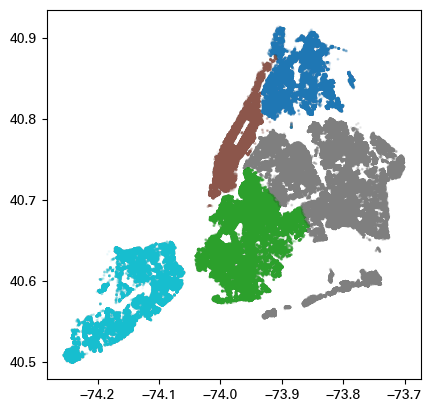

In [22]:
## plot to check geometry - can take a long time
gdf_permits.plot(markersize=1,
                 alpha=0.05,
                 column='boro')

##### Save gdf_permits points geodataframe
(Interim checkpoint in case of kernel death, etc.)

In [23]:
## save permit point CSV file
gdf_permits.to_csv('output/gdf_permits.csv')

In [24]:
## save permit point shapefile
# gdf_permits.to_file('output/gdf_permits')

##### Reload gdf_permits points geodataframe

In [26]:
## Re-load Viz File
if os.path.exists('output/gdf_permits.csv'): # if CSV exists...
    gdf_permits = pd.read_csv('output/gdf_permits.csv', index_col=0,
                                   parse_dates = ['datefil', 'dateiss', 'dateexp', 'datejob', 'dobrundate'])
    gdf_permits['geometry'] = gdf_permits['geometry'].apply(loads)
    gdf_permits = gpd.GeoDataFrame(gdf_permits, geometry="geometry", crs="EPSG:4326")
gdf_permits

C:\Users\willy\AppData\Local\Temp\ipykernel_46224\2568382482.py:3: DtypeWarning: Columns (16,34,35,36,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  gdf_permits = pd.read_csv('output/gdf_permits.csv', index_col=0,


,boro,bin,house,street,jobnum,jobdoc,jobtype,selfcert,block,lot,...,O_hzip,O_phone,dobrundate,permnum,latitude,longitude,CD,CT,NTA,geometry
0,QUEENS,4084956,60-18,MADISON STREET,401420878,1,A1,NaN,3530,13,...,11385,7183661799,2017-11-03,10,40.706546,-73.899449,30,587,Ridgewood,POINT (-73.89945 40.70655)
1,QUEENS,4014077,23-23,48 STREET,401170166,1,NB,NaN,746,38,...,11103,7187288038,2017-11-03,11,40.767000,-73.903647,22,141,Astoria,POINT (-73.90365 40.76700)
2,QUEENS,4537413,127-02,172 STREET,402412607,1,NB,NaN,12529,247,...,-1,5164370900,05/09/2022 00:00:00,29,40.680620,-73.771680,27,33401,St. Albans,POINT (-73.77168 40.68062)
3,BROOKLYN,3012124,869,47 STREET,302333302,1,A1,NaN,760,49,...,-1,-1,05/09/2022 00:00:00,41,40.641958,-74.000555,38,94,Sunset Park East,POINT (-74.00056 40.64196)
4,QUEENS,4008239,34-14,34 STREET,401061140,1,NB,NaN,610,34,...,11103,7187288038,2017-11-03,42,40.758169,-73.925177,26,57,Astoria,POINT (-73.92518 40.75817)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996544,MANHATTAN,1090443,1227,BROADWAY,121191986,1,NB,N,831,68,...,-1,2129962880,07/31/2024 00:00:00,3979463,40.746635,-73.988491,3,76,Midtown-Midtown South,POINT (-73.98849 40.74663)
996545,MANHATTAN,1044019,1291,3RD AVENUE,121188339,1,A1,N,1429,1,...,-1,6462029674,07/31/2024 00:00:00,3979466,40.771199,-73.959532,4,134,Lenox Hill-Roosevelt Island,POINT (-73.95953 40.77120)
996546,STATEN ISLAND,5013211,26,WATER STREET,520122661,1,A1,N,493,8,...,-1,9176123883,07/31/2024 00:00:00,3979467,40.627200,-74.075336,49,21,Stapleton-Rosebank,POINT (-74.07534 40.62720)
996547,BROOKLYN,3395110,2154,ATLANTIC AVE,321198388,1,NB,N,1433,22,...,-1,9177090530,07/31/2024 00:00:00,3979468,40.676577,-73.915300,41,303,Ocean Hill,POINT (-73.91530 40.67658)


# Aggregating Spatialized Data

## School District Boundaries
*Will be used to understand new construction and alterations within school districts.*

Department of City Planning (DCP). “School Districts.” ESRI Shapefile, Polygon Boundaries. \
New York, NY: NYC OpenData, Bytes of the Big Apple, May 6, 2024. \
Accessed July 26th, 2024 via: https://data.cityofnewyork.us/Education/School-Districts/r8nu-ymqj

##### Load school districts shapefile from API

In [27]:
# School Districts
SD_API = "https://data.cityofnewyork.us/resource/cuae-wd7h.geojson"
SD_outputpath = 'data/gdf_permits_SchoolDistrict'
export_CSV = True
export_SHP = False

if os.path.exists(SD_outputpath):
    ## reload previous
    gdf_SD = gpd.read_file(SD_outputpath)
    ## reformat to string with leading zero
    gdf_SD = gdf_SD.rename(columns={'school_dis':'schooldist'})
else:
    ## read from the API
    gdf_SD = gpd.read_file(SD_API)
    gdf_SD = gdf_SD.rename(columns={'school_dist':'schooldist'})
    gdf_SD.to_file(SD_outputpath)
    
## dissolve separated geometry (District 10)
gdf_SD = gdf_SD.dissolve(by='schooldist', aggfunc='sum').reset_index()

## reformat to string with leading zero
gdf_SD['schoolstr'] = gdf_SD['schooldist'].astype('str').str.zfill(2)

## reproject to same projection as CRS file
gdf_SD = gdf_SD.to_crs(gdf_permits.crs)

print(gdf_SD.crs) # check coordinate ref system, make sure it matches point file
display(gdf_SD)

EPSG:4326


,schooldist,geometry,shape_leng,shape_area,schoolstr
0,1,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",28647.0153568,35160467.8445,01
1,10,"MULTIPOLYGON (((-73.90898 40.87222, -73.90902 ...",94958.42127677883.37163734,282541964.5383282963.06451,10
2,11,"MULTIPOLYGON (((-73.78833 40.83467, -73.78931 ...",304613.926592,393207952.277,11
3,12,"POLYGON ((-73.88284 40.84782, -73.88200 40.847...",48690.620264,69089358.6594,12
4,13,"POLYGON ((-73.97906 40.70595, -73.97924 40.705...",86649.0963736,104871083.068,13
5,14,"POLYGON ((-73.95440 40.73911, -73.95428 40.739...",96895.5015631,150290386.52,14
6,15,"POLYGON ((-73.98633 40.69105, -73.98536 40.690...",153439.200201,196154191.521,15
7,16,"POLYGON ((-73.93312 40.69579, -73.93237 40.695...",35848.9081061,46763798.9402,16
8,17,"POLYGON ((-73.92044 40.66563, -73.92061 40.665...",68356.1019864,128440514.782,17
9,18,"MULTIPOLYGON (((-73.86953 40.59871, -73.86967 ...",120925.187236,175191726.482,18


##### Re-load previous, or clean and save version of data for analysis

In [28]:
permits_SD_outputpath = 'output/gdf_permits_SchoolDistrict'
date_cols = ['datefil', 'dateiss', 'dateexp', 'datejob', 'dobrundate']
export_CSV = True
export_SHP = False


if os.path.exists(permits_SD_outputpath): # if directory exists...
    gdf_permits = gpd.read_file(permits_SD_outputpath, # reload shapefile
                                parse_dates = date_cols) # read as datetime
elif os.path.exists(permits_SD_outputpath+'.csv'): # if CSV exists...
    gdf_permits = pd.read_csv(permits_SD_outputpath+'.csv', index_col=0, # reload csv file
                                parse_dates = date_cols) # read as datetime
    gdf_permits['geometry'] = gdf_permits['geometry'].apply(loads) # prep geom col to be read
    gdf_permits = gpd.GeoDataFrame(gdf_permits, geometry="geometry", crs="EPSG:4326") # convert to geodataframe
else:
    ## Spatial Join
    gdf_permits = gpd.sjoin(gdf_permits, # point file
                            gdf_SD[['schooldist', 'schoolstr', 'geometry']], # school district boundary
                            how='left') # SPATIAL JOIN
    print("Finished spatial join.")
    
    ## Export CSV file
    if export_CSV:
        gdf_permits = gdf_permits.drop(columns=['index_right'], errors='ignore') # drop unnecessary columns from spatial join
        gdf_permits.to_csv(permits_SD_outputpath+'.csv') # CSV
        print("Exported CSV file.")
    
    ## Export shapefile
    if export_SHP:
        date_columns = gdf_permits.select_dtypes(include=['datetime64']).columns.tolist() # datetime incompatible with ESRI Shapefile
        gdf = gdf_permits.copy() # create a copy
        gdf[date_columns] = gdf[date_columns].astype(str) # convert datetime to string
        gdf.to_file(permits_SD_outputpath) # shapefile
        print("Exported shapefile.")

## check quality of join by missing values
print(gdf_permits['schooldist'].isna().value_counts()) 
see_cols(gdf_permits) # look over columns
display(gdf_permits)

C:\Users\willy\AppData\Local\Temp\ipykernel_46224\982848411.py:11: DtypeWarning: Columns (16,34,35,36,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  gdf_permits = pd.read_csv(permits_SD_outputpath+'.csv', index_col=0, # reload csv file


schooldist
False    992529
True          1
Name: count, dtype: int64

63 columns with 992530 rows:
Dups in object,  	(0) nulls.		 [0] 	"boro"
Dups in int64,  	(0) nulls.		 [1] 	"bin"
Dups in object,  	(0) nulls.		 [2] 	"house"
Dups in object,  	(0) nulls.		 [3] 	"street"
Dups in int64,  	(0) nulls.		 [4] 	"jobnum"
Dups in int64,  	(0) nulls.		 [5] 	"jobdoc"
Dups in object,  	(0) nulls.		 [6] 	"jobtype"
Dups in object,  	(364548) nulls.		 [7] 	"selfcert"
Dups in int64,  	(235) nulls.		 [8] 	"block"
Dups in int64,  	(243) nulls.		 [9] 	"lot"
Dups in int64,  	(121) nulls.		 [10] 	"CB"
Dups in int64,  	(158) nulls.		 [11] 	"zip"
Dups in int64,  	(3750) nulls.		 [12] 	"bldgtype"
Dups in object,  	(225252) nulls.		 [13] 	"res"
Dups in object,  	(902543) nulls.		 [14] 	"spd1"
Dups in object,  	(992472) nulls.		 [15] 	"spd2"
Dups in object,  	(565462) nulls.		 [16] 	"worktype"
Dups in object,  	(4503) nulls.		 [17] 	"status"
Dups in object,  	(0) nulls.		 [18] 	"statusfil"
Dups in object,  	(1

,boro,bin,house,street,jobnum,jobdoc,jobtype,selfcert,block,lot,...,dobrundate,permnum,latitude,longitude,CD,CT,NTA,geometry,schooldist,schoolstr
0,QUEENS,4084956,60-18,MADISON STREET,401420878,1,A1,NaN,3530,13,...,2017-11-03,10,40.706546,-73.899449,30,587,Ridgewood,POINT (-73.89945 40.70655),24.0,24.0
1,QUEENS,4014077,23-23,48 STREET,401170166,1,NB,NaN,746,38,...,2017-11-03,11,40.767000,-73.903647,22,141,Astoria,POINT (-73.90365 40.76700),30.0,30.0
2,QUEENS,4537413,127-02,172 STREET,402412607,1,NB,NaN,12529,247,...,05/09/2022 00:00:00,29,40.680620,-73.771680,27,33401,St. Albans,POINT (-73.77168 40.68062),28.0,28.0
3,BROOKLYN,3012124,869,47 STREET,302333302,1,A1,NaN,760,49,...,05/09/2022 00:00:00,41,40.641958,-74.000555,38,94,Sunset Park East,POINT (-74.00056 40.64196),15.0,15.0
4,QUEENS,4008239,34-14,34 STREET,401061140,1,NB,NaN,610,34,...,2017-11-03,42,40.758169,-73.925177,26,57,Astoria,POINT (-73.92518 40.75817),30.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996519,BRONX,2130803,1847,SEWARD AVENUE,210180908,1,NB,N,3600,4,...,07/30/2024 00:00:00,3979423,40.819433,-73.861181,18,16,Soundview-Castle Hill-Clason Point-Harding Park,POINT (-73.86118 40.81943),8.0,8.0
996520,BRONX,2130803,1847,SEWARD AVENUE,210180908,1,NB,N,3600,4,...,07/30/2024 00:00:00,3979424,40.819433,-73.861181,18,16,Soundview-Castle Hill-Clason Point-Harding Park,POINT (-73.86118 40.81943),8.0,8.0
996521,BRONX,2130803,1847,SEWARD AVENUE,210180908,1,NB,N,3600,4,...,07/30/2024 00:00:00,3979425,40.819433,-73.861181,18,16,Soundview-Castle Hill-Clason Point-Harding Park,POINT (-73.86118 40.81943),8.0,8.0
996522,MANHATTAN,1055668,66,WEST 107TH STREET,123486343,1,A1,N,1842,57,...,07/30/2024 00:00:00,3979426,40.799594,-73.961635,7,193,Morningside Heights,POINT (-73.96164 40.79959),3.0,3.0


## Atomic Polygons

*Intersection of multiple boundaries by DCP. \
Can be used when comparing new construction and alterations between school districts and other types of boundaries.*

Department of City Planning (DCP). “Atomic Polygons.” ESRI Shapefile, Polygon Boundaries. \
New York, NY: NYC OpenData (Bytes of the Big Apple), June 16, 2024. \
Accessed July 26, 2024 via: https://data.cityofnewyork.us/City-Government/Atomic-Polygons/djze-f4qi

##### Download from local file or from API

In [29]:
AP_API = "https://data.cityofnewyork.us/resource/wgbs-damt.geojson"
AP_download_outputpath = "data/_download/Atomic Polygons"
AP_outputpath = "data/atomicpolygons"

if os.path.exists(AP_outputpath): # if directory exists...
    gdf_AP = gpd.read_file(AP_outputpath) # read previously called API file
elif os.path.exists(AP_download_outputpath): # if directory exists...
    gdf_AP = gpd.read_file(AP_download_outputpath) # read downloaded file on local drive
else: # call API (may take a long time)
    gdf_AP = gpd.read_file(AP_API + urlencode({'$limit':'70000'})) # 69602 polygons
    gdf_AP.to_file(AP_outputpath ) # save for next time

## rename school district column to avoid conflicting
gdf_AP = gdf_AP.rename(columns={'schooldist':'atomicSD'})

## reproject to same projection as CRS file
gdf_AP = gdf_AP.to_crs(gdf_permits.crs)

print(gdf_AP.crs) # check coordinate ref system, make sure it matches point file
display(gdf_AP)

EPSG:4326


,admin_fire,assemdist,atomic_num,atomicid,borough,censusbl_1,censusbl_2,censusbl_3,censusbl_4,censusbl_5,...,sb1_volume,sb2_page,sb2_volume,sb3_page,sb3_volume,atomicSD,shape_area,shape_leng,water_flag,geometry
0,E 151,62,None,5024401430,5,None,1020,None,1007,None,...,05,None,None,None,None,31,244110.620576,2424.560416,2,"POLYGON ((-74.24520 40.50412, -74.24609 40.503..."
1,E 151,62,None,5024401439,5,None,2004,None,2010,None,...,05,None,None,None,None,31,177042.348067,1722.931212,2,"POLYGON ((-74.23942 40.50558, -74.23932 40.505..."
2,E 151,62,None,5024402223,5,B,1005,None,1004,None,...,05,529,05,None,None,31,33790.844037,770.085650,2,"POLYGON ((-74.23102 40.50647, -74.23108 40.506..."
3,E 151,62,None,5024401441,5,None,2005,None,2011,None,...,05,None,None,None,None,31,171623.335762,1697.908522,2,"POLYGON ((-74.23818 40.50553, -74.23932 40.505..."
4,E 151,62,None,5024401440,5,None,1018,None,1021,None,...,05,None,None,None,None,31,78855.828376,1243.106869,2,"POLYGON ((-74.25173 40.50688, -74.25146 40.505..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69597,E 228,51,None,3001802266,3,None,1017,None,1000,None,...,06,None,None,None,None,15,19455.410018,884.627114,2,"POLYGON ((-74.00640 40.66135, -74.00656 40.661..."
69598,E 228,51,None,3001802267,3,None,1017,None,1000,None,...,06,None,None,None,None,15,129595.061264,2022.794564,2,"POLYGON ((-74.01091 40.65715, -74.01105 40.657..."
69599,E 228,51,None,3001802268,3,None,1017,None,1000,None,...,06,None,None,None,None,15,938878.086750,5931.584424,2,"POLYGON ((-74.01091 40.65715, -74.01162 40.657..."
69600,E 228,51,None,3001802248,3,None,1017,None,1010,None,...,06,None,None,None,None,15,2823.589582,316.970548,2,"POLYGON ((-74.01342 40.65791, -74.01382 40.658..."


##### Re-load previous, or clean and save version of data for analysis

In [30]:
permits_AP_outputpath = 'output/gdf_permits_AtomicPolygons'
date_cols = ['datefil', 'dateiss', 'dateexp', 'datejob', 'dobrundate']
export_CSV = True
export_SHP = False

if os.path.exists(permits_AP_outputpath): # if directory exists...
    gdf_permits = gpd.read_file(permits_AP_outputpath,
                                   parse_dates = date_cols) # reload shapefile
elif os.path.exists(permits_AP_outputpath+'.csv'): # if CSV exists...
    gdf_permits = pd.read_csv(permits_AP_outputpath+'.csv', index_col=0, # reload csv file
                                   parse_dates = date_cols) # read as datetime
    gdf_permits['geometry'] = gdf_permits['geometry'].apply(loads) # prep geom col to be read
    gdf_permits = gpd.GeoDataFrame(gdf_permits, geometry="geometry", crs="EPSG:4326") # convert to geodataframe
else:
    ## Spatial Join
    gdf_permits = gpd.sjoin(gdf_permits, 
                        gdf_AP[['atomicid','atomicSD','geometry']], how='left')
    print("Finished spatial join.")
    
    ## Export CSV
    if export_CSV:
        gdf_permits = gdf_permits.drop(columns=['index_right'], errors='ignore')
        gdf_permits.to_csv(permits_AP_outputpath+'.csv')
        print("Exported CSV file.\n")
    
    ## Export shapefile
    if export_SHP:
        date_columns = gdf_permits.select_dtypes(include=['datetime64']).columns.tolist() # datetime incompatible with ESRI Shapefile 
        gdf = gdf_permits.copy() # create a copy
        gdf[date_columns] = gdf[date_columns].astype(str) # convert datetime to string
        gdf.to_file(permits_AP_outputpath)
        print("Exported shapefile.\n")

## check quality of join by missing values
print(gdf_permits['atomicid'].isna().value_counts()) # check number of atomic ids
print(gdf_permits['schooldist'].isna().value_counts()) # check number of school district didn't change
print(gdf_permits['atomicSD'].isna().value_counts()) # compare to atomic polygon school districts
see_cols(gdf_permits) # look over columns
display(gdf_permits)

C:\Users\willy\AppData\Local\Temp\ipykernel_46224\1627115801.py:10: DtypeWarning: Columns (16,34,35,36,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  gdf_permits = pd.read_csv(permits_AP_outputpath+'.csv', index_col=0, # reload csv file


atomicid
False    992529
True          1
Name: count, dtype: int64
schooldist
False    992529
True          1
Name: count, dtype: int64
atomicSD
False    992529
True          1
Name: count, dtype: int64

65 columns with 992530 rows:
Dups in object,  	(0) nulls.		 [0] 	"boro"
Dups in int64,  	(0) nulls.		 [1] 	"bin"
Dups in object,  	(0) nulls.		 [2] 	"house"
Dups in object,  	(0) nulls.		 [3] 	"street"
Dups in int64,  	(0) nulls.		 [4] 	"jobnum"
Dups in int64,  	(0) nulls.		 [5] 	"jobdoc"
Dups in object,  	(0) nulls.		 [6] 	"jobtype"
Dups in object,  	(364548) nulls.		 [7] 	"selfcert"
Dups in int64,  	(235) nulls.		 [8] 	"block"
Dups in int64,  	(243) nulls.		 [9] 	"lot"
Dups in int64,  	(121) nulls.		 [10] 	"CB"
Dups in int64,  	(158) nulls.		 [11] 	"zip"
Dups in int64,  	(3750) nulls.		 [12] 	"bldgtype"
Dups in object,  	(225252) nulls.		 [13] 	"res"
Dups in object,  	(902543) nulls.		 [14] 	"spd1"
Dups in object,  	(992472) nulls.		 [15] 	"spd2"
Dups in object,  	(565462) nulls.		 [

,boro,bin,house,street,jobnum,jobdoc,jobtype,selfcert,block,lot,...,latitude,longitude,CD,CT,NTA,geometry,schooldist,schoolstr,atomicid,atomicSD
0,QUEENS,4084956,60-18,MADISON STREET,401420878,1,A1,NaN,3530,13,...,40.706546,-73.899449,30,587,Ridgewood,POINT (-73.89945 40.70655),24.0,24.0,4.058700e+09,24.0
1,QUEENS,4014077,23-23,48 STREET,401170166,1,NB,NaN,746,38,...,40.767000,-73.903647,22,141,Astoria,POINT (-73.90365 40.76700),30.0,30.0,4.014100e+09,30.0
2,QUEENS,4537413,127-02,172 STREET,402412607,1,NB,NaN,12529,247,...,40.680620,-73.771680,27,33401,St. Albans,POINT (-73.77168 40.68062),28.0,28.0,4.033401e+09,28.0
3,BROOKLYN,3012124,869,47 STREET,302333302,1,A1,NaN,760,49,...,40.641958,-74.000555,38,94,Sunset Park East,POINT (-74.00056 40.64196),15.0,15.0,3.009402e+09,15.0
4,QUEENS,4008239,34-14,34 STREET,401061140,1,NB,NaN,610,34,...,40.758169,-73.925177,26,57,Astoria,POINT (-73.92518 40.75817),30.0,30.0,4.005700e+09,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996519,BRONX,2130803,1847,SEWARD AVENUE,210180908,1,NB,N,3600,4,...,40.819433,-73.861181,18,16,Soundview-Castle Hill-Clason Point-Harding Park,POINT (-73.86118 40.81943),8.0,8.0,2.001600e+09,8.0
996520,BRONX,2130803,1847,SEWARD AVENUE,210180908,1,NB,N,3600,4,...,40.819433,-73.861181,18,16,Soundview-Castle Hill-Clason Point-Harding Park,POINT (-73.86118 40.81943),8.0,8.0,2.001600e+09,8.0
996521,BRONX,2130803,1847,SEWARD AVENUE,210180908,1,NB,N,3600,4,...,40.819433,-73.861181,18,16,Soundview-Castle Hill-Clason Point-Harding Park,POINT (-73.86118 40.81943),8.0,8.0,2.001600e+09,8.0
996522,MANHATTAN,1055668,66,WEST 107TH STREET,123486343,1,A1,N,1842,57,...,40.799594,-73.961635,7,193,Morningside Heights,POINT (-73.96164 40.79959),3.0,3.0,1.019300e+09,3.0


# Remove Nulls Impacting Visualization

In [31]:
## Clean-Up Column(s) used for Mapping (Destructively)
## Discludes 1 permit falling out of school district
display(gdf_permits.loc[gdf_permits['schoolstr'].isna(),:])
gdf_permits = gdf_permits.dropna(subset=['geometry', 'schooldist'], how='any') # remove null values for fields necessary for visualization
gdf_permits['schoolstr'] = gdf_permits['schooldist'].fillna(-1).astype('int64', errors='ignore').apply("{:02d}".format) # set to int to get rid of float decimal places, then reformat to string with leading zero
gdf_permits = gdf_permits.dropna(subset=['schoolstr'], how='any') # remove null values for fields necessary for visualization

print(gdf_permits['schoolstr'].value_counts())

,boro,bin,house,street,jobnum,jobdoc,jobtype,selfcert,block,lot,...,latitude,longitude,CD,CT,NTA,geometry,schooldist,schoolstr,atomicid,atomicSD
447313,QUEENS,4177059,248-55,JAMAICA AVENUE,400983138,1,A1,NaN,8664,45,...,40.726366,-73.717008,23,1617,Bellerose,POINT (-73.71701 40.72637),NaN,NaN,NaN,NaN


schoolstr
31    126182
02     75595
27     64202
25     57085
26     44486
24     44177
14     44140
30     41247
29     38262
15     37773
20     35165
13     32749
28     32481
21     30897
22     29084
11     28072
19     26221
08     23128
17     19729
32     18887
16     18306
03     17418
10     17255
05     14198
12     13517
09     11918
23     11195
07     11021
01      8569
18      7950
06      6329
04      5291
Name: count, dtype: int64


In [32]:
## Add Labels/Groupings for Time Series
print(gdf_permits.shape)
date_cols = ['datefil', 'dateiss', 'dateexp', 'datejob', 'dobrundate']

Ycols = []
YMcols = []

for i,c in enumerate(date_cols):
    print("Original Nulls in {}:\t{}".format(c,gdf_permits[c].isna().sum()))
    gdf_permits[c] = pd.to_datetime(gdf_permits[c], format='mixed', errors='coerce')
    print("New Nulls in {}:\t{}".format(c,gdf_permits[c].isna().sum()))
    Ycol = c + 'Y'
    gdf_permits[Ycol] = gdf_permits[c].dt.year.apply("{0:4.0f}".format) # year
    gdf_permits.loc[gdf_permits[c].isna(), Ycol] = np.nan # get rid of weird formatting from nan
    Ycols.append(Ycol)
    YMcol = c + 'YM'
    gdf_permits[YMcol] = gdf_permits[Ycol]+"-"+gdf_permits[c].dt.month.apply("{0:02.0f}".format) # year-month
    gdf_permits.loc[gdf_permits[c].isna(), YMcol] = np.nan # get rid of weird formatting from nan
    print("Finished {}".format(c))
    YMcols.append(YMcol)

dtypeY_dict = dict.fromkeys(Ycols, 'str')
dtypeYM_dict = dict.fromkeys(YMcols, 'str')
display(gdf_permits)

(992529, 65)
Original Nulls in datefil:	1
New Nulls in datefil:	1
Finished datefil
Original Nulls in dateiss:	5159
New Nulls in dateiss:	5159
Finished dateiss
Original Nulls in dateexp:	1895
New Nulls in dateexp:	1895
Finished dateexp
Original Nulls in datejob:	6
New Nulls in datejob:	14
Finished datejob
Original Nulls in dobrundate:	0
New Nulls in dobrundate:	0
Finished dobrundate


,boro,bin,house,street,jobnum,jobdoc,jobtype,selfcert,block,lot,...,datefilY,datefilYM,dateissY,dateissYM,dateexpY,dateexpYM,datejobY,datejobYM,dobrundateY,dobrundateYM
0,QUEENS,4084956,60-18,MADISON STREET,401420878,1,A1,NaN,3530,13,...,2002,2002-11,2002,2002-11,2003,2003-06,2002,2002-11,2017,2017-11
1,QUEENS,4014077,23-23,48 STREET,401170166,1,NB,NaN,746,38,...,2002,2002-01,2002,2002-01,2002,2002-03,2001,2001-05,2017,2017-11
2,QUEENS,4537413,127-02,172 STREET,402412607,1,NB,NaN,12529,247,...,2006,2006-09,2006,2006-09,2007,2007-03,2006,2006-09,2022,2022-05
3,BROOKLYN,3012124,869,47 STREET,302333302,1,A1,NaN,760,49,...,2007,2007-08,2007,2007-08,2008,2008-08,2007,2007-08,2022,2022-05
4,QUEENS,4008239,34-14,34 STREET,401061140,1,NB,NaN,610,34,...,2002,2002-01,2002,2002-01,2002,2002-03,2000,2000-08,2017,2017-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996519,BRONX,2130803,1847,SEWARD AVENUE,210180908,1,NB,N,3600,4,...,2024,2024-07,2024,2024-07,2025,2025-07,2023,2023-12,2024,2024-07
996520,BRONX,2130803,1847,SEWARD AVENUE,210180908,1,NB,N,3600,4,...,2024,2024-07,2024,2024-07,2025,2025-07,2023,2023-12,2024,2024-07
996521,BRONX,2130803,1847,SEWARD AVENUE,210180908,1,NB,N,3600,4,...,2024,2024-07,2024,2024-07,2025,2025-07,2023,2023-12,2024,2024-07
996522,MANHATTAN,1055668,66,WEST 107TH STREET,123486343,1,A1,N,1842,57,...,2024,2024-07,2024,2024-07,2025,2025-07,2020,2020-01,2024,2024-07


In [33]:
## Save Viz File
gdf_permits.to_csv('output/gdf_permits_Viz.csv')

In [34]:
## Re-load Viz File
if os.path.exists('output/gdf_permits_Viz.csv'): # if CSV exists...
    gdf_permits = pd.read_csv('output/gdf_permits_Viz.csv', index_col=0,
                              parse_dates = date_cols,
                              dtype = dtypeY_dict | dtypeYM_dict)
    gdf_permits['geometry'] = gdf_permits['geometry'].apply(loads)
    gdf_permits = gpd.GeoDataFrame(gdf_permits, geometry="geometry", crs="EPSG:4326")
see_cols(gdf_permits)
display(gdf_permits)

C:\Users\willy\AppData\Local\Temp\ipykernel_46224\1082824156.py:3: DtypeWarning: Columns (16,34,35,36,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  gdf_permits = pd.read_csv('output/gdf_permits_Viz.csv', index_col=0,



75 columns with 992529 rows:
Dups in object,  	(0) nulls.		 [0] 	"boro"
Dups in int64,  	(0) nulls.		 [1] 	"bin"
Dups in object,  	(0) nulls.		 [2] 	"house"
Dups in object,  	(0) nulls.		 [3] 	"street"
Dups in int64,  	(0) nulls.		 [4] 	"jobnum"
Dups in int64,  	(0) nulls.		 [5] 	"jobdoc"
Dups in object,  	(0) nulls.		 [6] 	"jobtype"
Dups in object,  	(364547) nulls.		 [7] 	"selfcert"
Dups in int64,  	(235) nulls.		 [8] 	"block"
Dups in int64,  	(243) nulls.		 [9] 	"lot"
Dups in int64,  	(121) nulls.		 [10] 	"CB"
Dups in int64,  	(158) nulls.		 [11] 	"zip"
Dups in int64,  	(3750) nulls.		 [12] 	"bldgtype"
Dups in object,  	(225251) nulls.		 [13] 	"res"
Dups in object,  	(902542) nulls.		 [14] 	"spd1"
Dups in object,  	(992471) nulls.		 [15] 	"spd2"
Dups in object,  	(565461) nulls.		 [16] 	"worktype"
Dups in object,  	(4503) nulls.		 [17] 	"status"
Dups in object,  	(0) nulls.		 [18] 	"statusfil"
Dups in object,  	(1) nulls.		 [19] 	"type"
Dups in int64,  	(0) nulls.		 [20] 	"seqnum"


,boro,bin,house,street,jobnum,jobdoc,jobtype,selfcert,block,lot,...,datefilY,datefilYM,dateissY,dateissYM,dateexpY,dateexpYM,datejobY,datejobYM,dobrundateY,dobrundateYM
0,QUEENS,4084956,60-18,MADISON STREET,401420878,1,A1,NaN,3530,13,...,2002,2002-11,2002,2002-11,2003,2003-06,2002,2002-11,2017,2017-11
1,QUEENS,4014077,23-23,48 STREET,401170166,1,NB,NaN,746,38,...,2002,2002-01,2002,2002-01,2002,2002-03,2001,2001-05,2017,2017-11
2,QUEENS,4537413,127-02,172 STREET,402412607,1,NB,NaN,12529,247,...,2006,2006-09,2006,2006-09,2007,2007-03,2006,2006-09,2022,2022-05
3,BROOKLYN,3012124,869,47 STREET,302333302,1,A1,NaN,760,49,...,2007,2007-08,2007,2007-08,2008,2008-08,2007,2007-08,2022,2022-05
4,QUEENS,4008239,34-14,34 STREET,401061140,1,NB,NaN,610,34,...,2002,2002-01,2002,2002-01,2002,2002-03,2000,2000-08,2017,2017-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996519,BRONX,2130803,1847,SEWARD AVENUE,210180908,1,NB,N,3600,4,...,2024,2024-07,2024,2024-07,2025,2025-07,2023,2023-12,2024,2024-07
996520,BRONX,2130803,1847,SEWARD AVENUE,210180908,1,NB,N,3600,4,...,2024,2024-07,2024,2024-07,2025,2025-07,2023,2023-12,2024,2024-07
996521,BRONX,2130803,1847,SEWARD AVENUE,210180908,1,NB,N,3600,4,...,2024,2024-07,2024,2024-07,2025,2025-07,2023,2023-12,2024,2024-07
996522,MANHATTAN,1055668,66,WEST 107TH STREET,123486343,1,A1,N,1842,57,...,2024,2024-07,2024,2024-07,2025,2025-07,2020,2020-01,2024,2024-07


# Mapping Permits per School District

In [35]:
palette='YlOrBr'

## Summary Table: Permits per School District
permitsSD = gdf_permits[['schoolstr', 'permnum']].groupby('schoolstr').count().rename(columns={'permnum':'count'}).reset_index()
permitsSD['schoolstr'] = permitsSD['schoolstr'].apply("{:02d}".format) # fix after groupby
display(permitsSD)

## Ranks (Unused)
permitsSD['rank'] = permitsSD['count'].rank(method='max')

## Normalized Values to Map for Colors
def minmax(s):
    return [(x-s.min())/(s.max()-s.min()) for x in s]
permitsSD['norm'] = minmax(permitsSD['count'])

## Merge to geometry for mapping
permitsSD = pd.merge(permitsSD, gdf_SD, how='left', on='schoolstr')
permitsSD = permitsSD.set_geometry('geometry')

permitsSD['distlabel'] = permitsSD['schoolstr'].apply("#{}".format)
permitsSD['countlabel'] = permitsSD['count'].apply("{:,}".format)

## Mapped Colors
permitsSD['countcolor'] = permitsSD['norm'].apply(lambda x: mpl.colors.to_hex(plt.get_cmap(palette)(x)))

## Centroid for labels
# permitsSD['cPt'] = permitsSD.centroid
permitsSD['cx'] = permitsSD.centroid.x
permitsSD['cy'] = permitsSD.centroid.y

## Representative point
# permitsSD['rPt'] = permitsSD.geometry.representative_point()
permitsSD['rx'] = permitsSD.representative_point().x
permitsSD['ry'] = permitsSD.representative_point().y

## Duplicate District #10 in original school district geom
permitsSD = permitsSD.drop_duplicates("schoolstr")

display(permitsSD)

,schoolstr,count
0,01,8569
1,02,75595
2,03,17418
3,04,5291
4,05,14198
5,06,6329
6,07,11021
7,08,23128
8,09,11918
9,10,17255


C:\Users\willy\AppData\Local\Temp\ipykernel_46224\150898685.py:28: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  permitsSD['cx'] = permitsSD.centroid.x
C:\Users\willy\AppData\Local\Temp\ipykernel_46224\150898685.py:29: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  permitsSD['cy'] = permitsSD.centroid.y


,schoolstr,count,rank,norm,schooldist,geometry,shape_leng,shape_area,distlabel,countlabel,countcolor,cx,cy,rx,ry
0,01,8569,4.0,0.027115,1,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",28647.0153568,35160467.8445,#01,"8,569",#fffddd,-73.982734,40.721440,-73.983076,40.721857
1,02,75595,31.0,0.581549,2,"MULTIPOLYGON (((-74.01534 40.69305, -74.01531 ...",207556.487722,279512457.871,#02,"75,595",#f27f1b,-73.986215,40.744522,-73.989733,40.744564
2,03,17418,11.0,0.100314,3,"POLYGON ((-73.95672 40.78660, -73.95716 40.785...",51922.3285231,113412690.636,#03,"17,418",#fff9c5,-73.969007,40.789017,-73.968946,40.789013
3,04,5291,1.0,0.000000,4,"MULTIPOLYGON (((-73.92114 40.80048, -73.92103 ...",52078.4121687,52615581.637,#04,"5,291",#ffffe5,-73.933810,40.792624,-73.942226,40.793282
4,05,14198,9.0,0.073678,5,"POLYGON ((-73.93570 40.83515, -73.93562 40.835...",44522.1807459,52525556.3852,#05,"14,198",#ffface,-73.944440,40.814714,-73.955572,40.817260
5,06,6329,2.0,0.008586,6,"POLYGON ((-73.92641 40.87762, -73.92635 40.877...",69010.3474696,96344129.0222,#06,"6,329",#fffee2,-73.934944,40.849564,-73.937500,40.847367
6,07,11021,5.0,0.047398,7,"MULTIPOLYGON (((-73.88859 40.79871, -73.88821 ...",65300.4281422,92258548.0341,#07,"11,021",#fffcd6,-73.911050,40.808781,-73.917989,40.813827
7,08,23128,15.0,0.147546,8,"MULTIPOLYGON (((-73.83967 40.83560, -73.83961 ...",222041.43911,258761330.318,#08,"23,128",#fff4b5,-73.850101,40.822400,-73.861141,40.818159
8,09,11918,7.0,0.054818,9,"MULTIPOLYGON (((-73.93307 40.82816, -73.93316 ...",44448.1144858,82980176.5706,#09,"11,918",#fffbd3,-73.913414,40.839005,-73.913564,40.839180
9,10,17255,10.0,0.098965,10,"MULTIPOLYGON (((-73.90898 40.87222, -73.90902 ...",94958.42127677883.37163734,282541964.5383282963.06451,#10,"17,255",#fff9c5,-73.893506,40.879564,-73.889374,40.878147


In [36]:
## Export
permitsSD.to_csv('output/permitsSD.csv')
permitsSD.to_file('output/permitsSD')

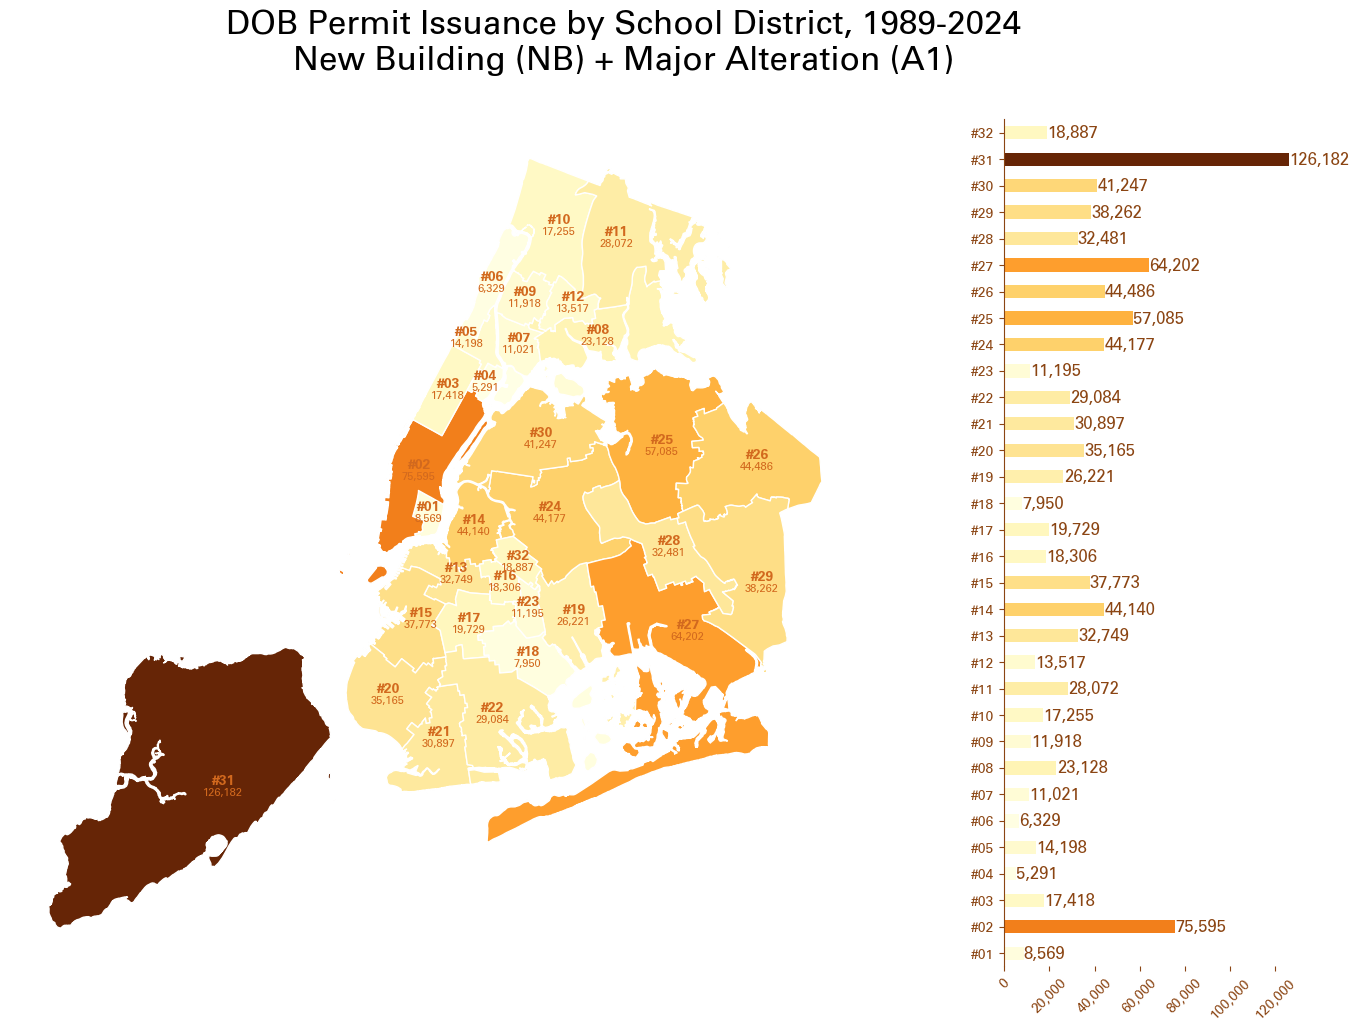

In [37]:
## MAP
fig, ax = plt.subplots(1,2, 
                       figsize=(17,11), 
                       gridspec_kw={'width_ratios': [3, 1]})

## AXES 0
## fill
permitsSD.plot(ax=ax[0], 
               column='count', 
               cmap='YlOrBr',
               edgecolor='white')

## labels for school districts
permitsSD.apply(lambda x: ax[0].annotate(text=x['distlabel'], 
                                      xy=x.geometry.representative_point().coords[0],
                                      color = "chocolate",
                                      fontname="Univers",
                                      fontweight="bold",
                                      va='bottom',
                                      ha='center'), axis=1)
## labels for counts
permitsSD.apply(lambda x: ax[0].annotate(text=x['countlabel'], 
                                      xy=x.geometry.representative_point().coords[0],
                                      color = "chocolate",
                                      fontname="Univers",
                                      fontsize=8,
                                      va='top',
                                      ha='center'), axis=1)
## formatting    
ax[0].set_axis_off()


## AXES 1
## bar chart as legend
permitsSD.plot.barh(ax=ax[1], x='distlabel', y='count', 
                    color=permitsSD['countcolor'])
## bar chart labels
for i, v in enumerate(permitsSD['count']):
    ax[1].text(v + 100, i, "{:,}".format(v), color='saddlebrown', fontname='Univers', fontsize=12, ha='left', va='center')

## Format Ticks
plt.xticks(fontname = 'Univers')
plt.yticks(fontname = 'Univers')
ax[1].tick_params(axis='y', colors='saddlebrown')
ax[1].tick_params(axis='x', colors='saddlebrown', rotation=45)
ax[1].get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
## Format Axes
ax[1].spines['left'].set_color('saddlebrown')
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].yaxis.label.set_visible(False)
## Bar chart substitutes for legend
ax[1].get_legend().remove()
## Title
fig.suptitle(t="DOB Permit Issuance by School District, 1989-2024\nNew Building (NB) + Major Alteration (A1)",
             fontsize=24,
             fontname='Univers',
             color="black")

plt.savefig('export/permitsMap+Bar.pdf', dpi=300)
plt.savefig('export/permitsMap+Bar.svg', dpi=300)

# Time Series of Permits per Month

In [38]:
geocol = 'schoolstr'
timecol = 'dateissYM'
countcol = 'permnum'

## Groupby school district and month
permitsSDMonthly = gdf_permits[[geocol, timecol, countcol]].dropna(subset=timecol).groupby([geocol, timecol]).count().reset_index()
permitsSDMonthly.to_csv('output/permitsSDMonthly.csv')
display(permitsSDMonthly)

## School district as columns and months and index for time series plot
permitsSDMonthlytable = permitsSDMonthly.pivot(index=timecol, columns=geocol, values=countcol).fillna(0).astype('int64')
permitsSDMonthlytable.to_csv('output/permitsSDMonthlytable.csv')
display(permitsSDMonthlytable)

,schoolstr,dateissYM,permnum
0,1,1990-06,2
1,1,1990-07,6
2,1,1990-08,1
3,1,1990-09,4
4,1,1990-10,5
...,...,...,...
13113,32,2024-03,15
13114,32,2024-04,13
13115,32,2024-05,24
13116,32,2024-06,16


schoolstr,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
dateissYM,,,,,,,,,,,,,,,,,,,,,
1989-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1989-06,0,0,0,0,0,0,3,0,0,0,...,0,0,2,0,3,0,1,0,0,0
1989-07,0,0,0,0,0,0,2,0,0,0,...,0,0,2,6,2,0,0,1,0,0
1989-08,0,0,0,0,0,0,2,0,0,0,...,0,2,3,9,1,2,3,5,0,0
1989-09,0,0,0,0,0,0,1,0,0,0,...,0,7,9,17,8,2,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03,9,71,13,2,8,9,9,10,7,29,...,8,18,34,23,23,26,8,46,43,15
2024-04,7,72,8,4,2,9,7,13,19,28,...,15,18,36,27,28,18,21,31,27,13
2024-05,31,72,11,5,9,8,5,10,11,27,...,8,24,27,10,20,23,15,27,39,24


In [39]:
## table for horizontal lines at each maximum
permitsSDMonthlymax = pd.concat([permitsSDMonthlytable.idxmax().rename('YM'), # concatenate each series
                               permitsSDMonthlytable.max().rename('max')],
                               axis=1).sort_values('max', ascending=False) # sort as highest at top
permitsSDMonthlymax.to_csv('output/permitsSDMonthlymax.csv')
permitsSDMonthlymax

,YM,max
schoolstr,,
31,2003-10,1049
27,2005-03,667
29,2007-01,480
14,2008-06,407
2,2016-06,385
19,2006-05,358
24,2005-12,357
25,2005-07,340
28,2006-03,332


C:\Users\willy\AppData\Local\Temp\ipykernel_46224\4055188757.py:24: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  permitsSDMonthlytable.rolling(12, axis=0).mean().plot(ax=ax,


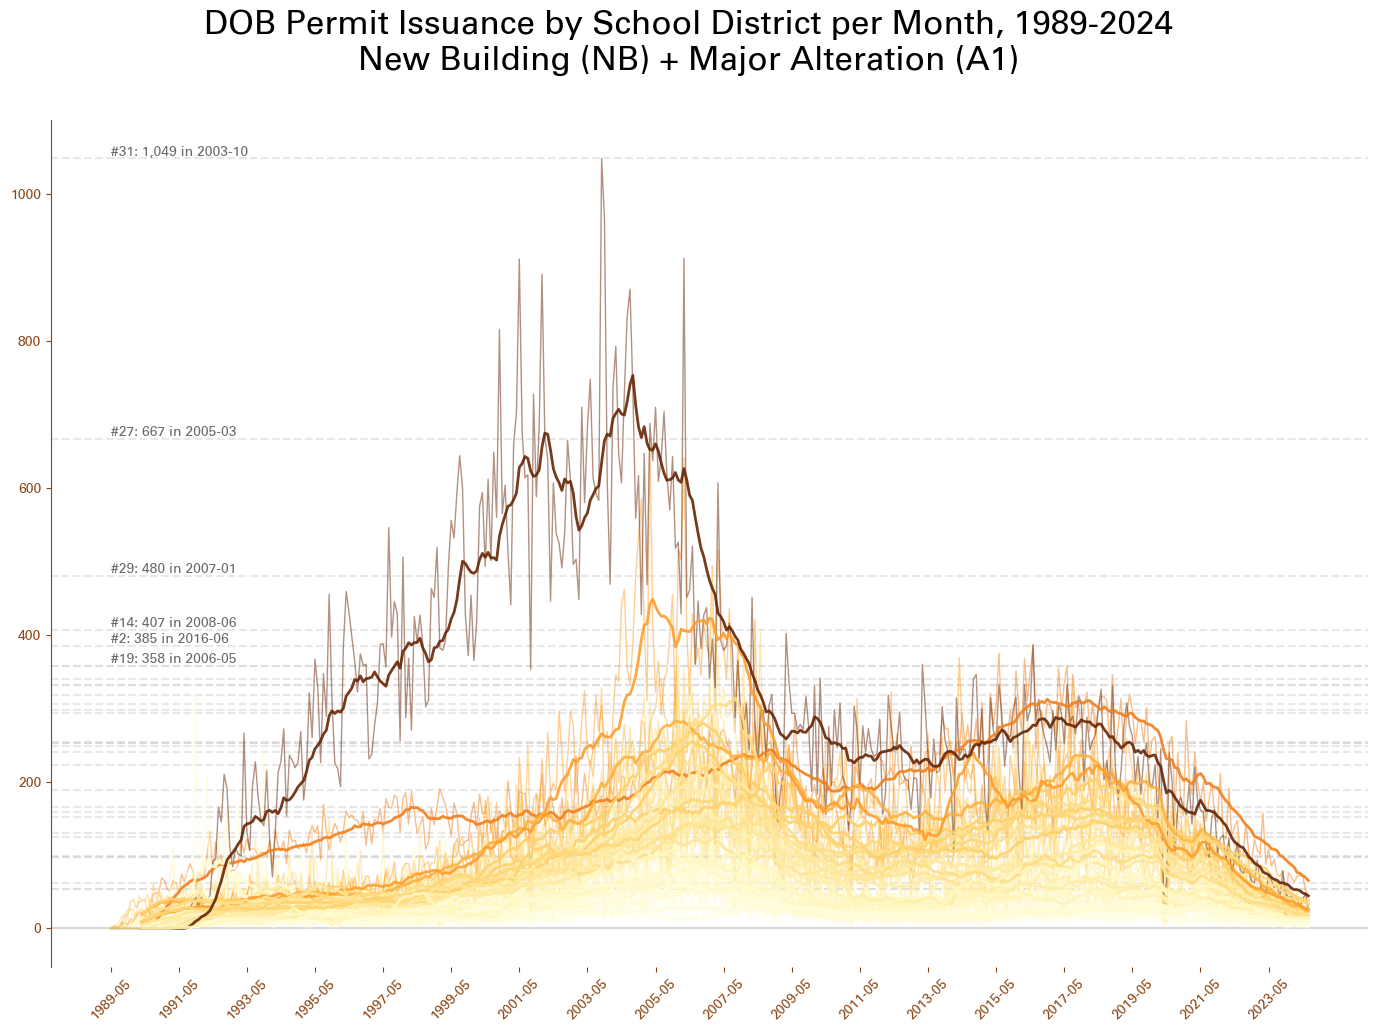

In [40]:
fig, ax = plt.subplots(figsize=(17,11), sharex=True, sharey=True)

## MAXIMUMS
## loop through horizontal lines with maximum
for i, v in enumerate(permitsSDMonthlymax['max']):
    plt.axhline(v, color='lightgrey', linestyle='--',alpha=0.5)
## label with a few of the maximums at the top
for i, v in enumerate(permitsSDMonthlymax['max'][0:6]):
    plt.text(0.01, v, 
             "#{}: {:,} in {}".format(str(permitsSDMonthlymax.index[i]), v, str(permitsSDMonthlymax['YM'].iloc[i])),
             fontname='Univers',
             color='dimgrey',
             ha='left', va='bottom')
## zero line
plt.axhline(0, color='lightgrey', alpha=0.9)

## TIME SERIES PLOT
permitsSDMonthlytable.plot(ax=ax, 
                           color=permitsSD['countcolor'],
                           linewidth=1,
                           alpha=0.5)

## ROLLIN AVERAGE 1-year
permitsSDMonthlytable.rolling(12, axis=0).mean().plot(ax=ax, 
                           color=permitsSD['countcolor'],
                           linewidth=2,
                           alpha=0.9)

## Format Ticks
## Ticks every 24 months or 2 years
plt.xticks(range(len(permitsSDMonthlytable))[::24], 
           permitsSDMonthlytable.index.tolist()[::24], 
           rotation=45, fontname = 'Univers')
plt.yticks(fontname = 'Univers')
ax.tick_params(axis='y', colors='saddlebrown')
ax.tick_params(axis='x', colors='saddlebrown')
## Format Axes
ax.spines['left'].set_color('saddlebrown')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.label.set_visible(False)
## Long Legend isn't very helpful
ax.get_legend().remove()
## Title
fig.suptitle(t="DOB Permit Issuance by School District per Month, 1989-2024\nNew Building (NB) + Major Alteration (A1)",
             fontsize=24,
             fontname='Univers',
             color="black")

plt.savefig('export/permitsTimeSeries.pdf', dpi=300)
plt.savefig('export/permitsTimeSeries.svg', dpi=300)

# Extra: Comparisons

## Projected Public School Ratio

School Construction Authority (SCA). “Projected Public School Ratio.” CSV, Table. \
New York, NY: NYC Open Data, January 30, 2024. \
Accessed July 26, 2024 via: https://data.cityofnewyork.us/Education/Projected-Public-School-Ratio/n7ta-pz8k/about_data.

In [110]:
PPSR_API = "https://data.cityofnewyork.us/resource/n7ta-pz8k.csv"
PPSR_outputpath = 'data/df_PPSR.csv'

if os.path.exists(PPSR_outputpath):
    df_PPSR = pd.read_csv(PPSR_outputpath)
else:
    df_PPSR = pd.read_csv(PPSR_API, index_col=0,
                          parse_dates=['data_as_of']) # read as dates
    df_PPSR.to_csv(PPSR_outputpath)
    
df_PPSR['data_as_of'] = pd.to_datetime(df_PPSR['data_as_of'], format='mixed', errors='coerce')
    
## New Versions and Month+Year Column
PPSRversions = pd.DataFrame( sorted(list(set(df_PPSR['data_as_of']))), columns=['ppsrdate'] ).reset_index().rename(columns={'index':'version'})
PPSRversions['monthyear'] = PPSRversions['ppsrdate'].dt.year.apply("{0:4.0f}".format)+"-"+PPSRversions['ppsrdate'].dt.month.apply("{0:02.0f}".format)
PPSRversions.to_csv('metadata/PPSRversions.csv')
display(PPSRversions)

display(df_PPSR)

,version,ppsrdate,monthyear
0,0,2015-06-04,2015-06
1,1,2017-09-12,2017-09
2,2,2019-03-13,2019-03
3,3,2019-12-18,2019-12
4,4,2023-01-05,2023-01
5,5,2024-01-12,2024-01


,borough,community_school_district,children_aged_4_10_contributed_per_housing_unit,children_aged_11_13_contributed_per_housing_unit,children_aged_14_17_contributed_per_housing_unit,data_as_of
0,Bronx,12.0,0.27,0.12,0.13,2024-01-12
1,Bronx,11.0,0.24,0.11,0.13,2024-01-12
2,Bronx,10.0,0.21,0.08,0.13,2024-01-12
3,Bronx,9.0,0.22,0.09,0.13,2024-01-12
4,Bronx,8.0,0.20,0.09,0.13,2024-01-12
...,...,...,...,...,...,...
135,NEW YORK CITY,NaN,1.29,0.53,0.67,2015-06-04
136,RICHMOND,NaN,0.21,0.09,0.14,2015-06-04
137,QUEENS,NaN,0.28,0.12,0.14,2015-06-04
138,BROOKLYN,NaN,0.29,0.12,0.14,2015-06-04


In [115]:
## CLEAN PROJECTED PUBLIC SCHOOL RATIO DATA
## rename columns to short names
PPSR_rename = {'community_school_district':'school_dist',
               'data_as_of':'ppsrdate',
               'children_aged_4_10_contributed_per_housing_unit':'PPSR0410',
               'children_aged_11_13_contributed_per_housing_unit':'PPSR1113',
               'children_aged_14_17_contributed_per_housing_unit':'PPSR1417'}
df_PPSR_clean = df_PPSR.rename(columns=PPSR_rename)

## Clean School District Number for Pivot
df_PPSR_clean = df_PPSR_clean.dropna(subset=['school_dist']).rename(columns={'school_dist':'schooldist'})
df_PPSR_clean['schooldist'] = df_PPSR_clean['schooldist'].astype('int64')
df_PPSR_clean['schoolstr'] = df_PPSR_clean['schooldist'].astype('str').str.zfill(2)

## Merge Versions and Month+Year Strings
df_PPSR_clean = pd.merge(df_PPSR_clean, PPSRversions, how='left', on='ppsrdate')
# display(df_PPSR_clean) # see table with strings formatted with year and month from datetime

## UNUSED: Pivot table to Multi-index columns
# df_PPSR_clean = pd.pivot_table(df_PPSR_clean[['school_dist', 'monthyear', 'Age04_10', 'Age11_13', 'Age14_17']],
#                          values=['Age04_10', 'Age11_13', 'Age14_17'],
#                          columns=['monthyear'],
#                          index=['school_dist'],
#                          dropna=False)
# df_PPSR_clean.columns = ["_".join(x) for x in df_PPSR_clean.columns.to_flat_index()]
# display(df_PPSR_clean) # see table with columns with multiindex

## JOIN TO SCHOOL DISTRICTS
PPSR_join = df_PPSR_clean[df_PPSR_clean['ppsrdate']==PPSRversions['ppsrdate'][-1:].item()] # select the latest date
PPSR_join = PPSR_join[['schoolstr','PPSR0410','PPSR1113','PPSR1417']]
# display(PPSR_join)

permitsPPSR = pd.merge(permitsSD, PPSR_join, how='left', on='schoolstr')

permitsPPSR.to_csv('data/permitsPPSR.csv')
permitsPPSR

,schoolstr,count,rank,norm,schooldist,geometry,shape_leng,shape_area,distlabel,countlabel,countcolor,cx,cy,rx,ry,PPSR0410,PPSR1113,PPSR1417
0,01,8569,4.0,0.027115,1,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",28647.0153568,35160467.8445,#01,"8,569",#fffddd,-73.982734,40.721440,-73.983076,40.721857,0.04,0.01,0.02
1,02,75595,31.0,0.581549,2,"MULTIPOLYGON (((-74.01534 40.69305, -74.01531 ...",207556.487722,279512457.871,#02,"75,595",#f27f1b,-73.986215,40.744522,-73.989733,40.744564,0.04,0.01,0.02
2,03,17418,11.0,0.100314,3,"POLYGON ((-73.95672 40.78660, -73.95716 40.785...",51922.3285231,113412690.636,#03,"17,418",#fff9c5,-73.969007,40.789017,-73.968946,40.789013,0.04,0.01,0.02
3,04,5291,1.0,0.000000,4,"MULTIPOLYGON (((-73.92114 40.80048, -73.92103 ...",52078.4121687,52615581.637,#04,"5,291",#ffffe5,-73.933810,40.792624,-73.942226,40.793282,0.07,0.03,0.02
4,05,14198,9.0,0.073678,5,"POLYGON ((-73.93570 40.83515, -73.93562 40.835...",44522.1807459,52525556.3852,#05,"14,198",#ffface,-73.944440,40.814714,-73.955572,40.817260,0.09,0.03,0.02
5,06,6329,2.0,0.008586,6,"POLYGON ((-73.92641 40.87762, -73.92635 40.877...",69010.3474696,96344129.0222,#06,"6,329",#fffee2,-73.934944,40.849564,-73.937500,40.847367,0.07,0.02,0.02
6,07,11021,5.0,0.047398,7,"MULTIPOLYGON (((-73.88859 40.79871, -73.88821 ...",65300.4281422,92258548.0341,#07,"11,021",#fffcd6,-73.911050,40.808781,-73.917989,40.813827,0.23,0.08,0.13
7,08,23128,15.0,0.147546,8,"MULTIPOLYGON (((-73.83967 40.83560, -73.83961 ...",222041.43911,258761330.318,#08,"23,128",#fff4b5,-73.850101,40.822400,-73.861141,40.818159,0.20,0.09,0.13
8,09,11918,7.0,0.054818,9,"MULTIPOLYGON (((-73.93307 40.82816, -73.93316 ...",44448.1144858,82980176.5706,#09,"11,918",#fffbd3,-73.913414,40.839005,-73.913564,40.839180,0.22,0.09,0.13
9,10,17255,10.0,0.098965,10,"MULTIPOLYGON (((-73.90898 40.87222, -73.90902 ...",94958.42127677883.37163734,282541964.5383282963.06451,#10,"17,255",#fff9c5,-73.893506,40.879564,-73.889374,40.878147,0.21,0.08,0.13


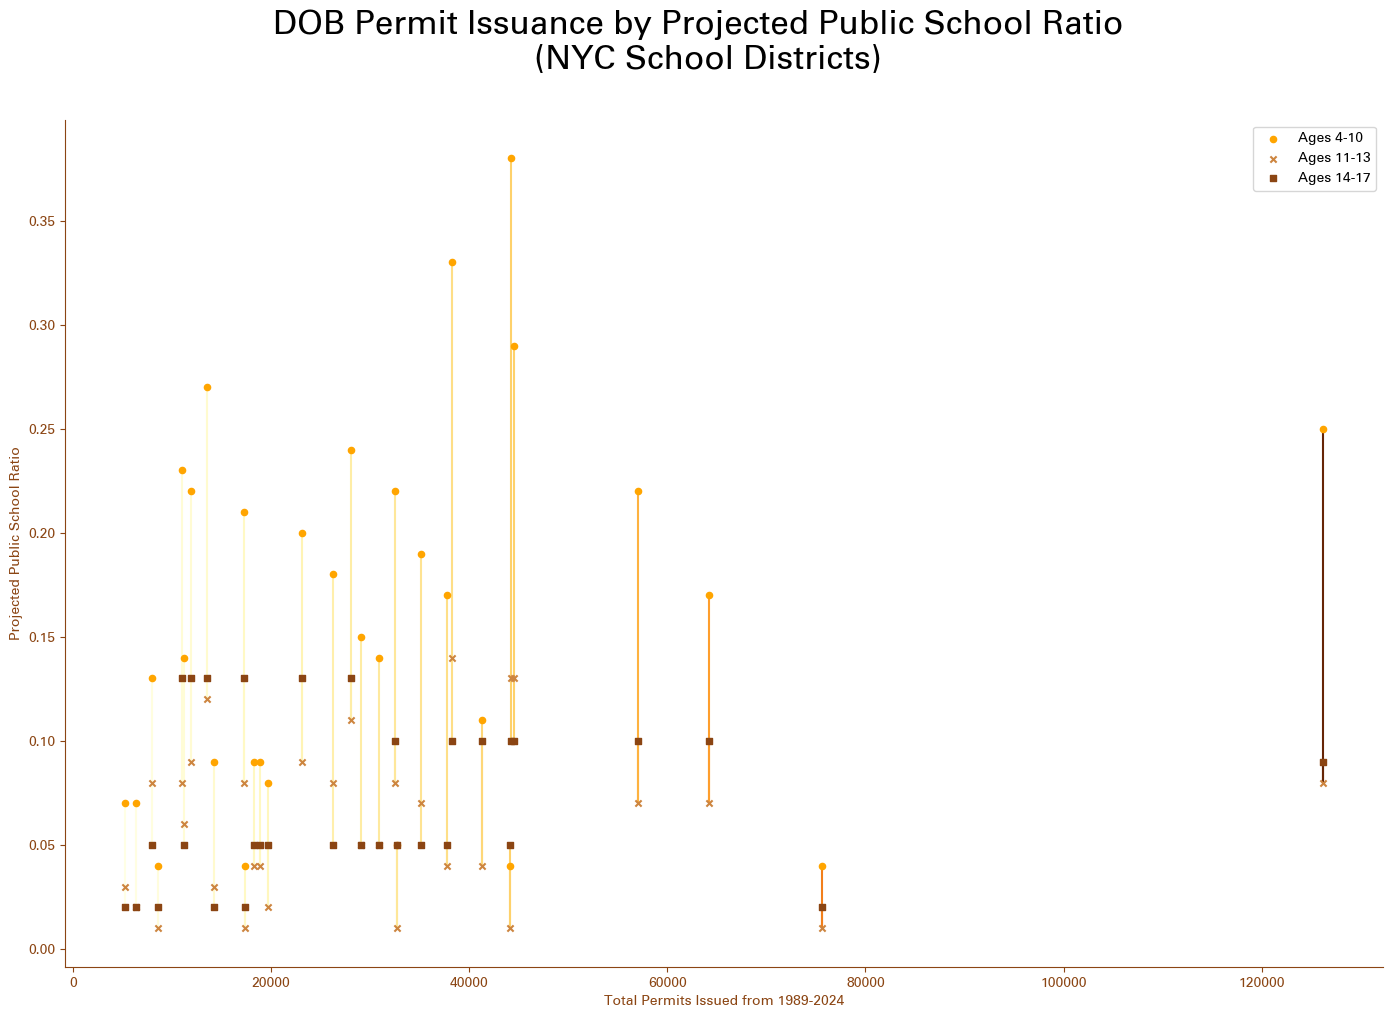

In [175]:
## SCATTER PLOT: RELATIONSHIP BETWEEN PPSR & DEVELOPMENT ACTIVITY
fig, ax = plt.subplots(figsize=(17,11), sharex=True, sharey=True)

## Lines
lines = pd.wide_to_long(permitsPPSR[['schoolstr', 'PPSR0410','PPSR1113','PPSR1417','count']],
                    stubnames='PPSR', 
                    i='schoolstr', j='age').reset_index()
for school in permitsPPSR['schoolstr']:
    color = permitsPPSR.loc[permitsPPSR['schoolstr'].eq(school), 'countcolor']
    lines[lines['schoolstr'].eq(school)].plot(ax=ax, x='count', y='PPSR', color=color, label="_{}".format(school))

## Dots
permitsPPSR.plot.scatter(ax=ax, x='count', y='PPSR0410', c='orange', label= "Ages 4-10", zorder=8)
permitsPPSR.plot.scatter(ax=ax, x='count', y='PPSR1113', c='peru', marker='x', label= "Ages 11-13", zorder=8)
permitsPPSR.plot.scatter(ax=ax, x='count', y='PPSR1417', c='saddlebrown', marker='s', label="Ages 14-17", zorder=8)    

## Format Ticks
## Ticks every 24 months or 2 years
plt.xticks(fontname = 'Univers')
plt.yticks(fontname = 'Univers')
ax.tick_params(axis='y', colors='saddlebrown')
ax.tick_params(axis='x', colors='saddlebrown')

## Format Axes
ax.spines['left'].set_color('saddlebrown')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('saddlebrown')
ax.spines['top'].set_visible(False)
plt.xlabel("Total Permits Issued from 1989-2024", color='saddlebrown')
plt.ylabel("Projected Public School Ratio", color='saddlebrown')
plt.legend()

## Title
fig.suptitle(t="DOB Permit Issuance by Projected Public School Ratio \n (NYC School Districts)",
             fontsize=24,
             fontname='Univers',
             color="black")

plt.savefig('export/permitsPPSR.pdf', dpi=300)
plt.savefig('export/permitsPPSR.svg', dpi=300)